In [1]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.45.3


In [3]:
# DB 연결, 커서 획득
# DB 생성 (오토 커밋)
conn = sqlite3.connect("datasets/test.db", isolation_level=None)
# 커서 획득
c = conn.cursor()
# 테이블 생성 (데이터 타입은 TEST, NUMERIC, INTEGER, REAL, BLOB 등)
c.execute("CREATE TABLE IF NOT EXISTS table1 \
    (id integer PRIMARY KEY, name text, birthday text)")

In [4]:
# 데이터 삽입 방법 1
c.execute("INSERT INTO table1 \
    VALUES(1, 'LEE', '1987-00-00')")

In [5]:
# 데이터 삽입 방법 2
c.execute("INSERT INTO table1(id, name, birthday) \
    VALUES(?,?,?)", \
    (2, 'KIM', '1990-00-00'))

In [6]:
test_tuple = (
    (3, 'PARK', '1991-00-00'),
    (4, 'CHOI', '1999-00-00'),
    (5, 'JUNG', '1989-00-00')
)
c.executemany("INSERT INTO table1(id, name, birthday) VALUES(?,?,?)", test_tuple)

In [7]:
# 데이터 불러오기
c.execute("SELECT * FROM table1")
print(c.fetchone())
print(c.fetchone())
print(c.fetchall())

(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
[(3, 'PARK', '1991-00-00'), (4, 'CHOI', '1999-00-00'), (5, 'JUNG', '1989-00-00')]


In [8]:
# 전체 데이터
c.execute("SELECT * FROM table1")
print(c.fetchall())

[(1, 'LEE', '1987-00-00'), (2, 'KIM', '1990-00-00'), (3, 'PARK', '1991-00-00'), (4, 'CHOI', '1999-00-00'), (5, 'JUNG', '1989-00-00')]


In [9]:
# 리스트 형태로 출력
# 방법 1
c.execute("SELECT * FROM table1")
for row in c.fetchall():
    print(row)
# 방법 2
for row in c.execute("SELECT * FROM table1 ORDER BY id ASC"):
    print(row)

(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'PARK', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'JUNG', '1989-00-00')
(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'PARK', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'JUNG', '1989-00-00')


In [10]:
# 데이터 수정

# 방법 1
c.execute("UPDATE table1 SET name=? WHERE id=?", ('NEW1', 1))
# 방법 2
c.execute("UPDATE table1 SET name=:name WHERE id=:id", {"name": 'NEW2', 'id': 3})
# 방법 3
c.execute("UPDATE table1 SET name='%s' WHERE id='%s'" % ('NEW3', 5))
# 확인
for row in c.execute('SELECT * FROM table1'):
    print(row)

(1, 'NEW1', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'NEW2', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'NEW3', '1989-00-00')


In [11]:
# 데이터 삭제하기

# 방법 1
c.execute("DELETE FROM table1 WHERE id=?", (1,))
# 방법 2
c.execute("DELETE FROM table1 WHERE id=:id", {'id': 3})
# 방법 3
c.execute("DELETE FROM table1 WHERE id='%s'" % 5)
# 확인
for row in c.execute('SELECT * FROM table1'):
    print(row)

(2, 'KIM', '1990-00-00')
(4, 'CHOI', '1999-00-00')


In [12]:
# DB 백업하기 (dump)

with conn:
    with open('dump.sql', 'w') as f:
        for line in conn.iterdump():
            f.write('%s\n' % line)
        print('Completed.')

Completed.


In [13]:
# DB 연결 해제
conn.close()

# 데이터 정제 (Data Cleanup): Investigation, Matching, and Formatting

## Investigation : Query and replace

In [15]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.read_csv("datasets/titanic.csv")

# 두 개의 행을 확인합니다.
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
# 첫 번째 행을 선택합니다.
dataframe.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Gender                            male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [17]:
# 세 개의 행을 선택합니다.
dataframe.iloc[1:4]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [18]:
# 네 개의 행을 선택합니다.
dataframe.iloc[:4]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [19]:
# 인덱스를 설정합니다.
dataframe = dataframe.set_index(dataframe['Name'])

# 행을 확인합니다.
dataframe.loc['Braund, Mr. Owen Harris']

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Gender                            male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: Braund, Mr. Owen Harris, dtype: object

In [20]:
# dataframe[:2]와 동일합니다.
dataframe[:'Braund, Mr. Owen Harris']

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [21]:
dataframe[['Age', 'Gender']].head(2)

,Age,Gender
Name,,
"Braund, Mr. Owen Harris",22.0,male
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,female


In [22]:
# ‘Gender’ 열이 ‘female’인 행 중 처음 두 개를 출력합니다.
dataframe[dataframe['Gender'] == 'female'].head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# 행을 필터링합니다.
dataframe[(dataframe['Gender'] == 'female') & (dataframe['Age'] >= 60)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Andrews, Miss. Kornelia Theodosia",276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
"Turkula, Mrs. (Hedwig)",484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [36]:
import pandas as pd
from pandas import DataFrame, Series

df2 = DataFrame(
    [
        [20180220, 1, 'OLD', 20170561, '블랙 팬서', 1339822000, 171158],
        [20180220, 2, 'OLD', 20168250, '골든슬럼버', 363771900, 48097],
        [20180220, 3, 'OLD', 20179205, '조선명탐정: 흡혈괴마의 비밀', 296896400, 40318],
        [20180220, 4, 'OLD', 20176121, '흥부: 글로 세상을 바꾼 자', 126148600, 16991],
        [20180220, 5, 'OLD', 20078561, '명탐정 코난:감벽의 관', 78434800, 11466],
        [20180220, 6, 'OLD', 20179985, '코코', 56664400, 7967],
    ],columns=['targetDt','rank','rankOldAndNew','movieCd','movieNm','salesAmt','audiCnt'])

In [37]:
print(df2.iloc[0])

targetDt           20180220
rank                      1
rankOldAndNew           OLD
movieCd            20170561
movieNm               블랙 팬서
salesAmt         1339822000
audiCnt              171158
Name: 0, dtype: object


In [38]:
print(type(df2.iloc[0]))

<class 'pandas.core.series.Series'>


In [39]:
print(df2.iloc[[0,2]])

   targetDt  rank rankOldAndNew   movieCd          movieNm    salesAmt  \
0  20180220     1           OLD  20170561            블랙 팬서  1339822000   
2  20180220     3           OLD  20179205  조선명탐정: 흡혈괴마의 비밀   296896400   

   audiCnt  
0   171158  
2    40318  


In [40]:
temp = df2.loc[[False,False,True,False,False,False]] #cf) iloc: NotImplementedError: iLocation based boolean indexing on an integer type is not available 
#temp = df2.loc[df2['audiCnt'] == 40318]
print(temp)

   targetDt  rank rankOldAndNew   movieCd          movieNm   salesAmt  audiCnt
2  20180220     3           OLD  20179205  조선명탐정: 흡혈괴마의 비밀  296896400    40318


In [41]:
print(df2['audiCnt'] == 40318)

0    False
1    False
2     True
3    False
4    False
5    False
Name: audiCnt, dtype: bool


In [42]:
temp = df2.loc[df2['audiCnt'] >= 40318]
print(temp)

   targetDt  rank rankOldAndNew   movieCd          movieNm    salesAmt  \
0  20180220     1           OLD  20170561            블랙 팬서  1339822000   
1  20180220     2           OLD  20168250            골든슬럼버   363771900   
2  20180220     3           OLD  20179205  조선명탐정: 흡혈괴마의 비밀   296896400   

   audiCnt  
0   171158  
1    48097  
2    40318  


In [43]:
temp = df2.loc[(df2['audiCnt'] >= 40318) & (df2['rank'] >= 2)]
print(temp)

   targetDt  rank rankOldAndNew   movieCd          movieNm   salesAmt  audiCnt
1  20180220     2           OLD  20168250            골든슬럼버  363771900    48097
2  20180220     3           OLD  20179205  조선명탐정: 흡혈괴마의 비밀  296896400    40318


In [45]:
print(df2.iloc[0,0]) #20180220
print(df2.iloc[0,1]) #1
print(df2.iloc[0,2]) #OLD
print(df2.iloc[0,3]) #20170561
print(df2.iloc[0,4]) #블랙 팬서
print(df2.iloc[0,5]) #1339822000
print(df2.iloc[0,6]) #171158

print(df2.iloc[-1,0]) #20180220
print(df2.iloc[-1,1]) #6
print(df2.iloc[-1,2]) #OLD
print(df2.iloc[-1,3]) #20179985
print(df2.iloc[-1,4]) #코코
print(df2.iloc[-1,5]) #56664400
print(df2.iloc[-1,6]) #7967


print(df2.loc[0,'targetDt']) #20180220 #df2.loc[인덱스,컬럼 이름]   
print(df2.loc[0,'rank']) #1
print(df2.loc[0,'rankOldAndNew']) #OLD
print(df2.loc[0,'movieCd']) #20170561
print(df2.loc[0,'movieNm']) #블랙 팬서
print(df2.loc[0,'salesAmt']) #1339822000
print(df2.loc[0,'audiCnt']) #171158

20180220
1
OLD
20170561
블랙 팬서
1339822000
171158
20180220
6
OLD
20179985
코코
56664400
7967
20180220
1
OLD
20170561
블랙 팬서
1339822000
171158


In [48]:
import pandas as pd
##########데이터 로드
df1 = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 5],
        ['A03', 3, 4, 50, 149, 'country', 0, 7],
        ['A04', 5, 5, 40, 151, 'country', 0, 10],
        ['A05', 7, 5, 35, 154, 'city', 0, 12],
        ['A06', 2, 5, 45, 149, 'country', 0, 7],
        ['A07',8, 9, 40, 155, 'city', 1, 13],
        ['A08', 9, 10, 70, 155, 'city', 3, 13],
        ['A09', 6, 12, 55, 154, 'city', 0, 12],
        ['A10', 9, 2, 40, 156, 'city', 1, 13],
        ['A11', 6, 10, 60, 153, 'city', 0, 12],
        ['A12', 2, 4, 75, 151, 'country', 0, 6]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'score'])

In [49]:
df1 = df1.rename(index={0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five'}) #행(row) 이름 바꾸기

print(df1.loc['zero'])
#print(df1.iloc[0])

ID                A01
hour                2
attendance          1
weight             60
iq                139
region        country
library             0
score               3
Name: zero, dtype: object


In [50]:
print(df1.loc['zero']['score']) #3
#print(df1.loc['zero', 'score']) #3

3


In [51]:
print(df1.loc[['zero', 'one']])
#print(df1.iloc[[0, 1]])

       ID  hour  attendance  weight   iq   region  library  score
zero  A01     2           1      60  139  country        0      3
one   A02     3           2      80  148  country        0      5


In [52]:
print(df1.loc['zero':'one'])

       ID  hour  attendance  weight   iq   region  library  score
zero  A01     2           1      60  139  country        0      3
one   A02     3           2      80  148  country        0      5


In [53]:
print(df1['hour'] == 5)

zero     False
one      False
two      False
three     True
four     False
five     False
6        False
7        False
8        False
9        False
10       False
11       False
Name: hour, dtype: bool


In [54]:
df_search = df1[df1['hour'] == 5]
print(df_search)

        ID  hour  attendance  weight   iq   region  library  score
three  A04     5           5      40  151  country        0     10


In [55]:
df_search = df1[df1['hour'] != 5]
print(df_search)

       ID  hour  attendance  weight   iq   region  library  score
zero  A01     2           1      60  139  country        0      3
one   A02     3           2      80  148  country        0      5
two   A03     3           4      50  149  country        0      7
four  A05     7           5      35  154     city        0     12
five  A06     2           5      45  149  country        0      7
6     A07     8           9      40  155     city        1     13
7     A08     9          10      70  155     city        3     13
8     A09     6          12      55  154     city        0     12
9     A10     9           2      40  156     city        1     13
10    A11     6          10      60  153     city        0     12
11    A12     2           4      75  151  country        0      6


In [56]:
df_search = df1[df1['hour'] <= 5]
print(df_search)

        ID  hour  attendance  weight   iq   region  library  score
zero   A01     2           1      60  139  country        0      3
one    A02     3           2      80  148  country        0      5
two    A03     3           4      50  149  country        0      7
three  A04     5           5      40  151  country        0     10
five   A06     2           5      45  149  country        0      7
11     A12     2           4      75  151  country        0      6


In [57]:
df_search = df1[df1['hour'] >= 5]
print(df_search)

        ID  hour  attendance  weight   iq   region  library  score
three  A04     5           5      40  151  country        0     10
four   A05     7           5      35  154     city        0     12
6      A07     8           9      40  155     city        1     13
7      A08     9          10      70  155     city        3     13
8      A09     6          12      55  154     city        0     12
9      A10     9           2      40  156     city        1     13
10     A11     6          10      60  153     city        0     12


In [58]:
df_search = df1[(df1['hour'] <= 5) & (df1['hour'] >= 3)]
print(df_search)

        ID  hour  attendance  weight   iq   region  library  score
one    A02     3           2      80  148  country        0      5
two    A03     3           4      50  149  country        0      7
three  A04     5           5      40  151  country        0     10


In [59]:
df_search = df1[(df1['hour'] >= 5) | (df1['hour'] <= 3)]
print(df_search)

        ID  hour  attendance  weight   iq   region  library  score
zero   A01     2           1      60  139  country        0      3
one    A02     3           2      80  148  country        0      5
two    A03     3           4      50  149  country        0      7
three  A04     5           5      40  151  country        0     10
four   A05     7           5      35  154     city        0     12
five   A06     2           5      45  149  country        0      7
6      A07     8           9      40  155     city        1     13
7      A08     9          10      70  155     city        3     13
8      A09     6          12      55  154     city        0     12
9      A10     9           2      40  156     city        1     13
10     A11     6          10      60  153     city        0     12
11     A12     2           4      75  151  country        0      6


In [60]:
df_search = df1[df1['region'] == 'city']
#df_search = df1[df1['region'].str.match('city')]
#df_search = df1[df1['region'].str.contains('it')]
#df_search = df1[df1['region'].str.startswith('ci')]
#df_search = df1[df1['region'].str.endswith('ty')]
#df_search = df1[df1['region'].str.len() == 4]
#df_search = df1[df1['region'].str.upper() == 'CITY']
#df_search = df1[df1['region'].str.lower() == 'city']
#df_search = df1[df1['region'].str.strip() == 'city']
#df_search = df1[df1['region'].str.lstrip() == 'city']
#df_search = df1[df1['region'].str.rstrip() == 'city']
print(df_search)

       ID  hour  attendance  weight   iq region  library  score
four  A05     7           5      35  154   city        0     12
6     A07     8           9      40  155   city        1     13
7     A08     9          10      70  155   city        3     13
8     A09     6          12      55  154   city        0     12
9     A10     9           2      40  156   city        1     13
10    A11     6          10      60  153   city        0     12


In [61]:
import pandas as pd
import numpy as np

df3 = pd.DataFrame([
        [2, 1, 3],
        [np.nan, 2, 5],
        [np.nan, np.nan, 7],
        [np.nan, np.nan, 10],
        [7, 5, 12],
        [2, 5, 7],
        [8, 9, 13],
        [9, 10, 13],
        [6, 12, 12],
        [9, 2, 13],
        [np.nan, 10, 12],
        [2, 4, 6]
    ], columns=['hour', 'attendance', 'score'])

In [62]:
df_search = df3[df3['hour'].isnull()]
print(df_search)

    hour  attendance  score
1    NaN         2.0      5
2    NaN         NaN      7
3    NaN         NaN     10
10   NaN        10.0     12


In [63]:
df_search = df3[df3['hour'].notnull()]
#df_search = df3[~df3['hour'].isnull()]
print(df_search)

    hour  attendance  score
0    2.0         1.0      3
4    7.0         5.0     12
5    2.0         5.0      7
6    8.0         9.0     13
7    9.0        10.0     13
8    6.0        12.0     12
9    9.0         2.0     13
11   2.0         4.0      6


In [64]:
df3['hour'] = df3['hour'].fillna(5)
#df3['hour'] = df3['hour'].fillna(df3['hour'].mean())
#df3['hour'] = df3['hour'].fillna(df3['hour'].median())
#df3['hour'] = df3['hour'].fillna(df3['hour'].value_counts().index[0])

print(df3)

    hour  attendance  score
0    2.0         1.0      3
1    5.0         2.0      5
2    5.0         NaN      7
3    5.0         NaN     10
4    7.0         5.0     12
5    2.0         5.0      7
6    8.0         9.0     13
7    9.0        10.0     13
8    6.0        12.0     12
9    9.0         2.0     13
10   5.0        10.0     12
11   2.0         4.0      6


In [67]:
import pandas as pd
df1 = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 5],
        ['A03', 3, 4, 50, 149, 'country', 0, 7],
        ['A04', 5, 5, 40, 151, 'country', 0, 10],
        ['A05', 7, 5, 35, 154, 'city', 0, 12],
        ['A06', 2, 5, 45, 149, 'country', 0, 7],
        ['A07',8, 9, 40, 155, 'city', 1, 13],
        ['A08', 9, 10, 70, 155, 'city', 3, 13],
        ['A09', 6, 12, 55, 154, 'city', 0, 12],
        ['A10', 9, 2, 40, 156, 'city', 1, 13],
        ['A11', 6, 10, 60, 153, 'city', 0, 12],
        ['A12', 2, 4, 75, 151, 'country', 0, 6]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'score'])
print(df1)

     ID  hour  attendance  weight   iq   region  library  score
0   A01     2           1      60  139  country        0      3
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
3   A04     5           5      40  151  country        0     10
4   A05     7           5      35  154     city        0     12
5   A06     2           5      45  149  country        0      7
6   A07     8           9      40  155     city        1     13
7   A08     9          10      70  155     city        3     13
8   A09     6          12      55  154     city        0     12
9   A10     9           2      40  156     city        1     13
10  A11     6          10      60  153     city        0     12
11  A12     2           4      75  151  country        0      6


In [68]:
print(df1.sort_values(by='hour')) #by: 정렬 기준
#print(df1.sort_values(by=['hour']))

     ID  hour  attendance  weight   iq   region  library  score
0   A01     2           1      60  139  country        0      3
5   A06     2           5      45  149  country        0      7
11  A12     2           4      75  151  country        0      6
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
3   A04     5           5      40  151  country        0     10
8   A09     6          12      55  154     city        0     12
10  A11     6          10      60  153     city        0     12
4   A05     7           5      35  154     city        0     12
6   A07     8           9      40  155     city        1     13
7   A08     9          10      70  155     city        3     13
9   A10     9           2      40  156     city        1     13


In [69]:
print(df1.sort_values(by=['hour', 'attendance']))

     ID  hour  attendance  weight   iq   region  library  score
0   A01     2           1      60  139  country        0      3
11  A12     2           4      75  151  country        0      6
5   A06     2           5      45  149  country        0      7
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
3   A04     5           5      40  151  country        0     10
10  A11     6          10      60  153     city        0     12
8   A09     6          12      55  154     city        0     12
4   A05     7           5      35  154     city        0     12
6   A07     8           9      40  155     city        1     13
9   A10     9           2      40  156     city        1     13
7   A08     9          10      70  155     city        3     13


In [70]:
print(df1.sort_values(by=['hour', 'attendance']))

     ID  hour  attendance  weight   iq   region  library  score
0   A01     2           1      60  139  country        0      3
11  A12     2           4      75  151  country        0      6
5   A06     2           5      45  149  country        0      7
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
3   A04     5           5      40  151  country        0     10
10  A11     6          10      60  153     city        0     12
8   A09     6          12      55  154     city        0     12
4   A05     7           5      35  154     city        0     12
6   A07     8           9      40  155     city        1     13
9   A10     9           2      40  156     city        1     13
7   A08     9          10      70  155     city        3     13


In [71]:
print(df1.sort_values(by='hour', ascending=False)) #내림 차순 정렬
#print(df1.sort_values(by=['hour'], ascending=False)) 

     ID  hour  attendance  weight   iq   region  library  score
7   A08     9          10      70  155     city        3     13
9   A10     9           2      40  156     city        1     13
6   A07     8           9      40  155     city        1     13
4   A05     7           5      35  154     city        0     12
8   A09     6          12      55  154     city        0     12
10  A11     6          10      60  153     city        0     12
3   A04     5           5      40  151  country        0     10
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
0   A01     2           1      60  139  country        0      3
5   A06     2           5      45  149  country        0      7
11  A12     2           4      75  151  country        0      6


In [72]:
print(df1.sort_values(by=['hour', 'attendance'], ascending=False))

     ID  hour  attendance  weight   iq   region  library  score
7   A08     9          10      70  155     city        3     13
9   A10     9           2      40  156     city        1     13
6   A07     8           9      40  155     city        1     13
4   A05     7           5      35  154     city        0     12
8   A09     6          12      55  154     city        0     12
10  A11     6          10      60  153     city        0     12
3   A04     5           5      40  151  country        0     10
2   A03     3           4      50  149  country        0      7
1   A02     3           2      80  148  country        0      5
5   A06     2           5      45  149  country        0      7
11  A12     2           4      75  151  country        0      6
0   A01     2           1      60  139  country        0      3


In [73]:
print(df1['hour'].sort_values())

0     2
5     2
11    2
1     3
2     3
3     5
8     6
10    6
4     7
6     8
7     9
9     9
Name: hour, dtype: int64


In [74]:
print(df1['hour'].sort_values(ascending=False))

7     9
9     9
6     8
4     7
8     6
10    6
3     5
1     3
2     3
0     2
5     2
11    2
Name: hour, dtype: int64


In [75]:
df1 = df1.reset_index()
print(df1)

    index   ID  hour  attendance  weight   iq   region  library  score
0       0  A01     2           1      60  139  country        0      3
1       1  A02     3           2      80  148  country        0      5
2       2  A03     3           4      50  149  country        0      7
3       3  A04     5           5      40  151  country        0     10
4       4  A05     7           5      35  154     city        0     12
5       5  A06     2           5      45  149  country        0      7
6       6  A07     8           9      40  155     city        1     13
7       7  A08     9          10      70  155     city        3     13
8       8  A09     6          12      55  154     city        0     12
9       9  A10     9           2      40  156     city        1     13
10     10  A11     6          10      60  153     city        0     12
11     11  A12     2           4      75  151  country        0      6


In [76]:
df1 = df1.drop(columns=['index'])
print(df1)

     ID  hour  attendance  weight   iq   region  library  score
0   A01     2           1      60  139  country        0      3
1   A02     3           2      80  148  country        0      5
2   A03     3           4      50  149  country        0      7
3   A04     5           5      40  151  country        0     10
4   A05     7           5      35  154     city        0     12
5   A06     2           5      45  149  country        0      7
6   A07     8           9      40  155     city        1     13
7   A08     9          10      70  155     city        3     13
8   A09     6          12      55  154     city        0     12
9   A10     9           2      40  156     city        1     13
10  A11     6          10      60  153     city        0     12
11  A12     2           4      75  151  country        0      6


In [77]:
df1 = df1.reset_index(drop=False)
print(df1)

    index   ID  hour  attendance  weight   iq   region  library  score
0       0  A01     2           1      60  139  country        0      3
1       1  A02     3           2      80  148  country        0      5
2       2  A03     3           4      50  149  country        0      7
3       3  A04     5           5      40  151  country        0     10
4       4  A05     7           5      35  154     city        0     12
5       5  A06     2           5      45  149  country        0      7
6       6  A07     8           9      40  155     city        1     13
7       7  A08     9          10      70  155     city        3     13
8       8  A09     6          12      55  154     city        0     12
9       9  A10     9           2      40  156     city        1     13
10     10  A11     6          10      60  153     city        0     12
11     11  A12     2           4      75  151  country        0      6


In [79]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.read_csv("datasets/titanic.csv")

# 두 개의 행을 확인합니다.
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [80]:
# 고유한 값을 찾습니다.
dataframe['Gender'].unique()

array(['male', 'female'], dtype=object)

In [82]:
# 카운트를 출력합니다.
dataframe['Gender'].value_counts()

Gender
male      577
female    314
Name: count, dtype: int64

In [83]:
# 카운트를 출력합니다.
dataframe['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [84]:
# 고유한 값의 개수를 출력합니다.
dataframe['Pclass'].nunique()

3

In [85]:
dataframe.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [86]:
## 누락된 값을 선택하고 두 개의 행을 출력합니다.
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [87]:
## 누락된 값을 선택하고 두 개의 행을 출력합니다.
df.isnull().head()

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,False,False,False,False,False,False,False,False,False
2번,False,False,False,False,False,False,False,False,False
3번,False,False,False,False,False,False,False,False,False
4번,False,False,False,False,False,False,False,False,True
5번,False,False,False,False,False,False,False,False,True


In [88]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: SW특기입니다
해당 컬럼에 총 2개의 결측치가 존재합니다.


# Exploratory Data Analysis

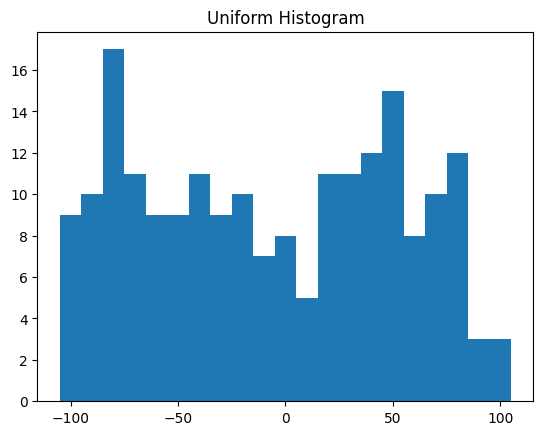

In [89]:
from typing import List, Dict
from collections import Counter
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def inverse_normal_cdf(p):
    return norm.ppf(p)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

random.seed(0)

uniform = [random.randrange(-100, 101) for _ in range(200)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(200)]

plot_histogram(uniform, 10, "Uniform Histogram")

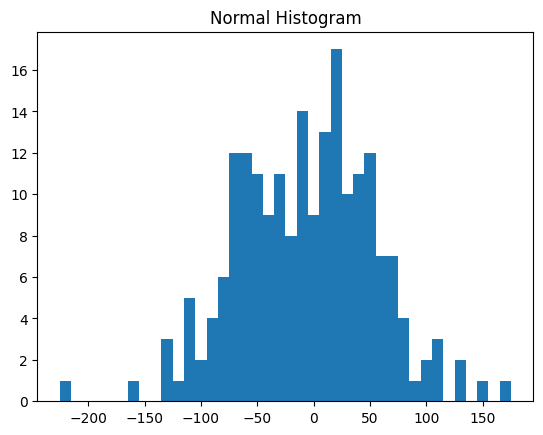

In [90]:
plot_histogram(normal, 10, "Normal Histogram")

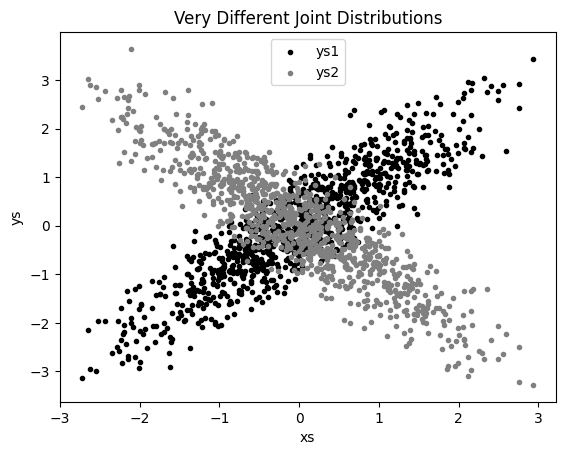

In [91]:
import random

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return random.gauss(0, 1)  # 평균이 0이고 표준 편차가 1인 정규 분포에서의 난수 생성

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

import matplotlib.pyplot as plt

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

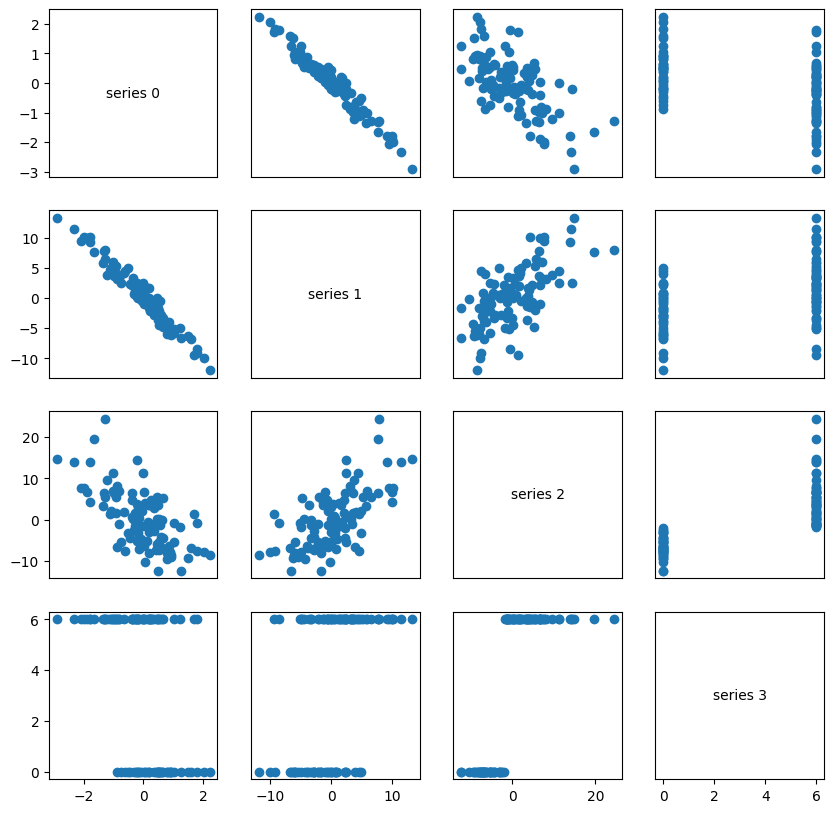

In [92]:
import random
import matplotlib.pyplot as plt
import numpy as np

def random_normal():
    """Returns a random draw from a standard normal distribution"""
    return random.gauss(0, 1)

def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

def shape(data):
    """Returns the shape of the data as (num_rows, num_columns)"""
    num_rows = len(data)
    num_columns = len(data[0]) if data else 0
    return num_rows, num_columns
def get_column(data, i):
    """Returns the ith column of data (as a list)"""
    return [data[row][i] for row in range(len(data))]

def correlation(column1, column2):
    """Returns the correlation between two columns of data"""
    return np.corrcoef(column1, column2)[0, 1]

def make_matrix(num_rows, num_columns, entry_fn):
    """Returns a num_rows x num_columns matrix
    whose (i, j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_columns)]
            for i in range(num_rows)]

def correlation_matrix(data):
    """Returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    num_rows, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)

num_points = 100

# 가상의 데이터 생성
random.seed(0)
data = [random_row() for _ in range(num_points)]

# 상관 행렬 계산
correlation_mat = correlation_matrix(data)

# 시각화 (산점도 행렬)
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns, figsize=(10, 10))

for i in range(num_columns):
    for j in range(num_columns):
        if i != j:
            ax[i, j].scatter(get_column(data, j), get_column(data, i))
        else:
            ax[i, j].annotate("series " + str(i), (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")
        
        if i < num_columns - 1:
            ax[i, j].xaxis.set_visible(False)
        if j > 0:
            ax[i, j].yaxis.set_visible(False)

ax[-1, -1].set_xlim(ax[0, -1].get_xlim())
ax[0, 0].set_ylim(ax[0, 1].get_ylim())

plt.show()

In [93]:
import numpy as np
import pandas as pd

file_in = './datasets/titanic.csv'
titanic_df = pd.read_csv(file_in)

titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
titanic_df.shape

(891, 12)

In [95]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [96]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [97]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [99]:
pd.set_option('display.max_columns',4)
titanic_df.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [100]:
pd.set_option('display.max_columns',None)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
print(titanic_df.index.name)

None


In [105]:
titanic_df.set_index("PassengerId", inplace=True)
print(titanic_df.index.name)

PassengerId


In [106]:
titanic_df.head()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
titanic_df.shape

(891, 11)

In [109]:
titanic_df_target =  titanic_df.loc[:,['Survived']]
titanic_df_features =  titanic_df.drop(['Survived'], axis=1)

In [110]:
titanic_df_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [111]:
titanic_df_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

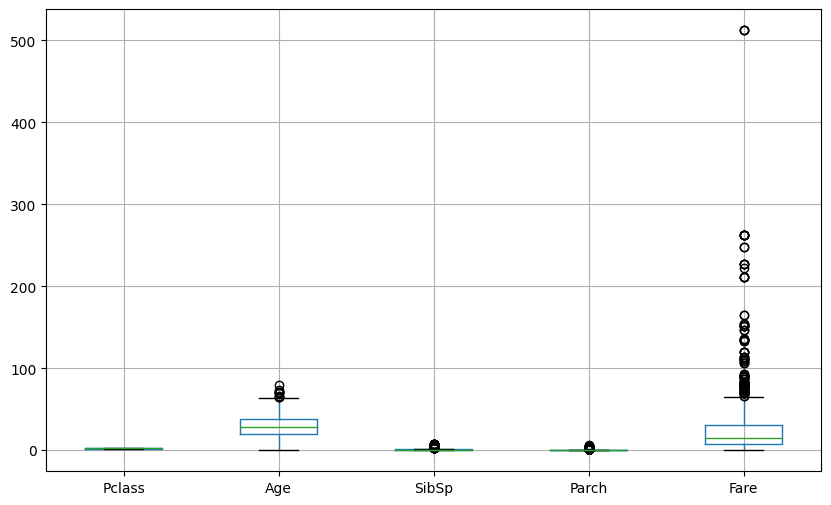

In [112]:
titanic_df_features.boxplot(figsize=(10,6))

### Question 1

In [113]:
import pandas as pd

DataUrl = 'https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/chipo.csv'
df = pd.read_csv(DataUrl)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Question 2

In [114]:
Ans = df.loc[df['quantity']==3].head()
Ans

,order_id,quantity,item_name,choice_description,item_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20
689,284,3,Canned Soft Drink,[Diet Coke],$3.75
818,338,3,Bottled Water,NaN,$3.27
850,350,3,Canned Soft Drink,[Sprite],$3.75


### Question 3

In [115]:
Ans = df.loc[df['quantity']==3].head().reset_index(drop=True)
Ans

,order_id,quantity,item_name,choice_description,item_price
0,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$32.94
1,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20
2,284,3,Canned Soft Drink,[Diet Coke],$3.75
3,338,3,Bottled Water,NaN,$3.27
4,350,3,Canned Soft Drink,[Sprite],$3.75


### Question 4

In [116]:
Ans =df[['quantity','item_price']].copy()
Ans

,quantity,item_price
0,1,$2.39
1,1,$3.39
2,1,$3.39
3,1,$2.39
4,2,$16.98
...,...,...
4617,1,$11.75
4618,1,$11.75
4619,1,$11.25
4620,1,$8.75


### Question 5

In [117]:
df['new_price'] = df['item_price'].str[1:].astype('float')
Ans = df['new_price'].head()
Ans

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: new_price, dtype: float64

### Question 6

In [120]:
Ans = len(df.loc[df.new_price <=5])
Ans

1652

### Question 7

In [121]:
Ans = df.loc[df.item_name =='Chicken Salad Bowl'].reset_index(drop=True)
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,20,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75
1,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",$22.50,22.50
2,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$22.50,22.50
3,111,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75,8.75
4,137,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables]",$17.50,17.50
...,...,...,...,...,...,...
105,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$17.50,17.50
106,1822,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Cheese, Gua...",$11.25,11.25
107,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
108,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Question 8

In [122]:
Ans = df.loc[(df.item_name =='Chicken Salad Bowl') & (df.new_price <= 9)]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
44,20,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75
256,111,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75,8.75
526,220,1,Chicken Salad Bowl,"[Roasted Chili Corn Salsa, [Black Beans, Sour ...",$8.75,8.75
528,221,1,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",$8.75,8.75
529,221,1,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",$8.75,8.75
568,234,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables]",$8.75,8.75
585,240,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables]",$8.75,8.75
693,286,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Sour Cream, Cheese, Lett...",$8.75,8.75
702,289,1,Chicken Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",$8.75,8.75
762,314,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Question 9

In [123]:
Ans = df.sort_values('new_price').reset_index(drop=True)
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,471,1,Bottled Water,NaN,$1.09,1.09
1,338,1,Canned Soda,[Coca Cola],$1.09,1.09
2,1575,1,Canned Soda,[Dr. Pepper],$1.09,1.09
3,47,1,Canned Soda,[Dr. Pepper],$1.09,1.09
4,1014,1,Canned Soda,[Coca Cola],$1.09,1.09
...,...,...,...,...,...,...
4617,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$33.75,33.75
4618,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00,35.00
4619,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$35.00,35.00
4620,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$35.25,35.25


### Question 10

In [124]:
Ans = df.loc[df.item_name.str.contains('Chips')]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
6,3,1,Side of Chips,NaN,$1.69,1.69
10,5,1,Chips and Guacamole,NaN,$4.45,4.45
14,7,1,Chips and Guacamole,NaN,$4.45,4.45
...,...,...,...,...,...,...
4596,1826,1,Chips and Guacamole,NaN,$4.45,4.45
4600,1827,1,Chips and Guacamole,NaN,$4.45,4.45
4605,1828,1,Chips and Guacamole,NaN,$4.45,4.45
4613,1831,1,Chips,NaN,$2.15,2.15


### Question 11

In [125]:
Ans = df.iloc[:,::2]
Ans

,order_id,item_name,item_price
0,1,Chips and Fresh Tomato Salsa,$2.39
1,1,Izze,$3.39
2,1,Nantucket Nectar,$3.39
3,1,Chips and Tomatillo-Green Chili Salsa,$2.39
4,2,Chicken Bowl,$16.98
...,...,...,...
4617,1833,Steak Burrito,$11.75
4618,1833,Steak Burrito,$11.75
4619,1834,Chicken Salad Bowl,$11.25
4620,1834,Chicken Salad Bowl,$8.75


### Question 12

In [127]:
Ans = df.sort_values('new_price',ascending=False).reset_index(drop=True)
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25
1,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$35.25,35.25
2,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$35.00,35.00
3,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00,35.00
4,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$33.75,33.75
...,...,...,...,...,...,...
4617,1578,1,Canned Soda,[Diet Dr. Pepper],$1.09,1.09
4618,1162,1,Bottled Water,NaN,$1.09,1.09
4619,567,1,Canned Soda,[Coca Cola],$1.09,1.09
4620,1014,1,Canned Soda,[Coca Cola],$1.09,1.09


### Question 13

In [128]:
Ans = df.loc[(df.item_name =='Steak Salad') | (df.item_name =='Bowl')]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20,22.20
664,276,1,Steak Salad,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$8.99,8.99
673,279,1,Bowl,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",$7.40,7.40
752,311,1,Steak Salad,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$8.99,8.99
893,369,1,Steak Salad,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$8.99,8.99
3502,1406,1,Steak Salad,"[[Lettuce, Fajita Veggies]]",$8.69,8.69


### Question 14

In [129]:
Ans = df.loc[(df.item_name =='Steak Salad') | (df.item_name =='Bowl')]
Ans = Ans.drop_duplicates('item_name')
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20,22.20
664,276,1,Steak Salad,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$8.99,8.99


### Question 15

In [130]:
Ans = df.loc[(df.item_name =='Steak Salad') | (df.item_name =='Bowl')]
Ans = Ans.drop_duplicates('item_name',keep='last')
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
673,279,1,Bowl,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",$7.40,7.40
3502,1406,1,Steak Salad,"[[Lettuce, Fajita Veggies]]",$8.69,8.69


### Question 16

In [131]:
df.loc[df.item_name =='Izze','item_name'] = 'Fizzy Lizzy'
Ans = df
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Fizzy Lizzy,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Question 17

In [132]:
Ans = df.choice_description.isnull().sum()
Ans

1246

### Question 18

In [133]:
df.loc[df.choice_description.isnull(),'choice_description'] ='NoData'
Ans = df
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,NoData,$2.39,2.39
1,1,1,Fizzy Lizzy,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NoData,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Question 19

In [134]:
Ans = df[df.choice_description.str.contains('Black')]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75,8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75,8.75
...,...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75,8.75
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25,11.25
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",$11.25,11.25
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25,9.25


### Question 20

In [136]:
Ans = len(df.loc[~df.choice_description.str.contains('Vegetables')])
Ans

3900

### Question 21

In [137]:
Ans = df[df.item_name.str.startswith('N')]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
22,11,1,Nantucket Nectar,[Pomegranate Cherry],$3.39,3.39
105,46,1,Nantucket Nectar,[Pineapple Orange Banana],$3.39,3.39
173,77,1,Nantucket Nectar,[Apple],$3.39,3.39
205,91,1,Nantucket Nectar,[Peach Orange],$3.39,3.39
436,189,1,Nantucket Nectar,[Pomegranate Cherry],$3.39,3.39
601,247,2,Nantucket Nectar,[Pineapple Orange Banana],$6.78,6.78
925,381,1,Nantucket Nectar,[Pomegranate Cherry],$3.39,3.39
1356,553,1,Nantucket Nectar,[Pomegranate Cherry],$3.39,3.39
1585,641,1,Nantucket Nectar,[Peach Orange],$3.39,3.39


### Question 22

In [138]:
Ans= df[df.item_name.str.len() >=15]
Ans

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,NoData,$2.39,2.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NoData,$2.39,2.39
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,9.25
10,5,1,Chips and Guacamole,NoData,$4.45,4.45
...,...,...,...,...,...,...
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75,8.75
4616,1832,1,Chips and Guacamole,NoData,$4.45,4.45
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Quizzes

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터입니다.  
주어진 코드를 이용하여 퀴즈를 풀어보시오. 

'영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10


In [139]:
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


### 전체 데이터 중에서 '영화' 정보만 출력하시오.

In [140]:
df['영화']

0           명량
1         극한직업
2    신과함께-죄와 벌
3         국제시장
4           괴물
5          도둑들
6      7번방의 선물
7           암살
Name: 영화, dtype: object

### 전체 데이터 중에서 '영화', '평점' 정보를 출력하시오.

In [141]:
df[['영화', '평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께-죄와 벌,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.10


### 2015년 이후에 개봉한 영화 데이터 중에서 '영화', '개봉 연도' 정보를 출력하시오.

In [142]:
df.loc[df['개봉 연도'] >= 2015, ['영화', '개봉 연도']]

,영화,개봉 연도
1,극한직업,2019
2,신과함께-죄와 벌,2017
7,암살,2015


In [143]:
df['추천 점수'] = (df['관객 수'] * df['평점']) // 100
df

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


### 전체 데이터를 '개봉 연도' 기준 내림차순으로 출력하시오.

In [144]:
df.sort_values('개봉 연도', ascending=False)

,영화,개봉 연도,관객 수,평점,추천 점수
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
7,암살,2015,1270,9.10,115.0
0,명량,2014,1761,8.88,156.0
3,국제시장,2014,1426,9.16,130.0
6,7번방의 선물,2013,1281,8.83,113.0
5,도둑들,2012,1298,7.64,99.0
4,괴물,2006,1301,8.62,112.0


# 데이터 정제(Data Cleansing)

In [147]:
print("Hello!")
print('한글도 쓸 수 있어요')

Hello!
한글도 쓸 수 있어요


In [149]:
print("내 이름은 " + "홍길동" + "입니다.")

내 이름은 홍길동입니다.


In [150]:
print("*" * 10)
n = 10
print("별표를 " + str(n) + "번 출력합니다.")
print("*" * n)

**********
별표를 10번 출력합니다.
**********


In [151]:
print("한 줄 쓰고\n그 다음 줄을 쓴다.")

한 줄 쓰고
그 다음 줄을 쓴다.


In [152]:
print("한 줄 쓰고 ", end="")
print("이어서 쓴다.")

한 줄 쓰고 이어서 쓴다.


In [153]:
name = "홍길동"
print("내 이름은 " + name + "입니다.")
mark = "$"
n = 20
print(mark + " 기호를 " + str(n) + "번 출력합니다.")
print(mark * n)

내 이름은 홍길동입니다.
$ 기호를 20번 출력합니다.
$$$$$$$$$$$$$$$$$$$$


In [154]:
print('둘리가 "호이!"하고 말했어요.')
print("둘리가 '이제 어디로 가지?'하고 생각했어요.")
# print("둘리가 "호이!"하고 말했어요")
print("둘리가 \"호이!\"하고 말했어요")

둘리가 "호이!"하고 말했어요.
둘리가 '이제 어디로 가지?'하고 생각했어요.
둘리가 "호이!"하고 말했어요


In [159]:
print("Life is short, You need Python.")
print("Life is short,\n You need Python.")
print("Pine \"Apple\" 입니다.") # Pine"Apple" 입니다.
print("C:\\DEV\\KoreaTech_SamsungElectronics>")  # C:\DEV\KoreaTech_SamsungElectronics>
print("Red Apple\rPine") # PineApple
print("Redd\bApple") # RedApple
print("Red\tApple") # Red     Apple

Life is short, You need Python.
Life is short,
 You need Python.
Pine "Apple" 입니다.
C:\DEV\KoreaTech_SamsungElectronics>
PineApple
RedApple
Red	Apple


In [161]:
multi_line_string = """
파이썬(영어: Python)은 1991년 프로그래머인 
귀도 반 로섬(Guido van Rossum)이 발표한 고급 프로그래밍 언어로,
플랫폼 독립적이며 인터프리터식, 객체지향적, 동적 타이핑(dynamically typed) 
대화형 언어이다. 파이썬이라는 이름은 귀도가 좋아하는 코미디 〈Monty Python's Flying 
Circus〉에서 따온 것이다."""

print(multi_line_string)


파이썬(영어: Python)은 1991년 프로그래머인 
귀도 반 로섬(Guido van Rossum)이 발표한 고급 프로그래밍 언어로,
플랫폼 독립적이며 인터프리터식, 객체지향적, 동적 타이핑(dynamically typed) 
대화형 언어이다. 파이썬이라는 이름은 귀도가 좋아하는 코미디 〈Monty Python's Flying 
Circus〉에서 따온 것이다.


In [162]:
print("2023.03.01".replace(".","-"))

2023-03-01


In [163]:
print("word with space".replace(" ",""))

wordwithspace


### Replacing

In [35]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.read_csv("datasets/titanic.csv")

# 두 개의 행을 확인합니다.
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [164]:
# 값을 치환하고 두 개의 행을 출력합니다.
dataframe.replace(1, "One").head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,One,0,3,"Braund, Mr. Owen Harris",male,22.0,One,0,A/5 21171,7.2500,NaN,S
1,2,One,One,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,One,0,PC 17599,71.2833,C85,C


In [165]:
# 값을 치환하고 두 개의 행을 출력합니다.
dataframe.replace(r"1st", "First", regex=True).head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [166]:
# 값을 치환하고 두 개의 행을 출력합니다.
dataframe['Gender'].replace("female", "Woman").head(2)

0     male
1    Woman
Name: Gender, dtype: object

In [167]:
# "female"과 "male을 "Woman"과 "Man"으로 치환합니다.
dataframe['Gender'].replace(["female", "male"], ["Woman", "Man"]).head(5)

0      Man
1    Woman
2    Woman
3    Woman
4      Man
Name: Gender, dtype: object

In [168]:
# female과 male을 person으로 바꿉니다.
dataframe.replace(["female", "male"], "person").head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",person,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",person,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",person,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [169]:
# female을 1로 바꾸고 male을 0으로 바꿉니다.
dataframe.replace({"female": 1, "male": 0}).head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [170]:
# 열 이름을 바꾸고 두 개의 행을 출력합니다.
dataframe.rename(columns={'PClass': 'Passenger Class'}).head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


###

In [171]:
# 라이브러리를 임포트합니다.
import collections

# 딕셔너리를 만듭니다.
column_names = collections.defaultdict(str)

# 키를 만듭니다.
for name in dataframe.columns:
    column_names[name]

# 딕셔너리를 출력합니다.
column_names

defaultdict(str,
            {'PassengerId': '',
             'Survived': '',
             'Pclass': '',
             'Name': '',
             'Gender': '',
             'Age': '',
             'SibSp': '',
             'Parch': '',
             'Ticket': '',
             'Fare': '',
             'Cabin': '',
             'Embarked': ''})

In [172]:
# 인덱스 0을 -1로 바꿉니다.
dataframe.rename(index={0:-1}).head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
-1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [173]:
# 열 이름을 소문자로 바꿉니다.
dataframe.rename(str.lower, axis='columns').head(2)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [174]:
python = "Life is short, You need Python."

print(python.lower()) 
print(python.upper()) 
print(python[0].isupper()) # True : 0 번째 인덱스의 값이 대문자인지 확인
print(len(python)) # 17 : 띄어쓰기를 포함한 문자열의 전체 길이 (length)
print(python.replace("Python", "Java")) 
index = python.index("n") # 처음으로 발견된 n 의 인덱스
print(index) # 5 : Python 의 n
index = python.index("n", index + 1) # 6 번째 인덱스 이후에 처음으로 발견된 n 의 인덱스 
print(index) 
find = python.find("n") # 처음으로 발견된 n 의 인덱스
print(find) # 5 : Python 의 n
find = python.find("n", find + 1) # 6 번째 인덱스 이후에 처음으로 발견된 n 의 인덱스 
print(find) 
#print(python.index("Java")) # Java 가 없기 때문에 에러가 발생하며 프로그램 종료
print(python.find("Java")) # Java 가 없으면 -1 을 반환(출력)하며 프로그램 계속 수행
print(python.count("n")) # 2 : 문자열 내에서 n 이 나온 횟수

life is short, you need python.
LIFE IS SHORT, YOU NEED PYTHON.
True
31
Life is short, You need Java.
19
29
19
29
-1
2


In [175]:
company = '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'
print(company.find('전자'))
print(company.index('전자'))

2
2


In [176]:
company= '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'
print(company.find('네이버'))
print(company.index('네이버'))

-1


ValueError: substring not found

In [181]:
company= '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'
try:
    print(company.index('전자'))
except ValueError:
    print("-1")

2


In [182]:
company= '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'
try:
    print(company.index('네이버'))
except ValueError:
    print("-1")

-1


In [183]:
company= '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'

index = 0
while index > -1:
    index = company.find('전자', index)
    if index > -1:
        print(index)
        index += len('전자')

2
7


In [184]:
company= '삼성전자,LG전자,현대자동차,CJ,SK텔레콤'

index = 0
while index > -1:
    try:
        index = company.index('전자', index)
        print(index)
        index += len('전자')
    except ValueError:
        break

2
7


In [185]:
# 방법 1

print("나는 %d살입니다." % 20) # 나는 20살입니다
print("나는 %s을 좋아합니다." % "파이썬") # 나는 파이썬을 좋아합니다.
print("Apple 은 %c로 시작해요." % "A") # Apple 은 A로 시작해요.

print("나는 %s살입니다." % 20) # 나는 20살입니다 (%s 로도 정수값 표현 가능)

print("나는 %s색과 %s색을 좋아해요." % ("파란", "빨간")) # 나는 파란색과 빨간색을 좋아해요.

나는 20살입니다.
나는 파이썬을 좋아합니다.
Apple 은 A로 시작해요.
나는 20살입니다.
나는 파란색과 빨간색을 좋아해요.


In [186]:
# 방법 2

print("나는 {}살입니다.".format(20)) # 나는 20살입니다.
print("나는 {}색과 {}색을 좋아해요.".format("파란", "빨간")) # 나는 파란색과 빨간색을 좋아해요
print("나는 {0}색과 {1}색을 좋아해요.".format("파란", "빨간")) # 나는 파란색과 빨간색을 좋아해요
print("나는 {1}색과 {0}색을 좋아해요.".format("파란", "빨간")) # 나는 빨간색과 파란색을 좋아해요

나는 20살입니다.
나는 파란색과 빨간색을 좋아해요.
나는 파란색과 빨간색을 좋아해요.
나는 빨간색과 파란색을 좋아해요.


In [187]:
# 방법 3

print("나는 {age}살이며, {color}색을 좋아해요.".format(age=20, color="빨간"))
# 나는 20살이며, 빨간색을 좋아해요

print("나는 {age}살이며, {color}색을 좋아해요.".format(color="빨간", age=20))
# 나는 20살이며, 빨간색을 좋아해요 (.format 뒤에 순서를 변경해도 괜찮아요)

나는 20살이며, 빨간색을 좋아해요.
나는 20살이며, 빨간색을 좋아해요.


In [188]:
# 방법 4 (파이썬 버전 3.6 부터 가능)

age = 20
color = "빨간"
print(f"나는 {age}살이며, {color}색을 좋아해요.") # 나는 20살이며, 빨간색을 좋아해요.

나는 20살이며, 빨간색을 좋아해요.


### Question 1

## Q
```
다음과 같은 데이터를 정제하여

	A	B	C
0	1	1	1
1	0	0	1
2	1	1	0
3	0	0	0

아래와 같은 결과를 얻도록 하라.
0	A,B,C
1	C
2	A,B
3	


In [189]:
import pandas as pd
df = pd.DataFrame([[1, 1, 1], [0, 0, 1], [1, 1, 0], [0, 0, 0]],
                  columns = ["A", "B", "C"])
df

,A,B,C
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0


In [190]:
df2 = df.copy()
for col in df.columns:
    df2[col] = df2[col].replace(to_replace = 1, value = col)
    df2[col] = df2[col].replace(to_replace = 0, value = "")
    
df2

,A,B,C
0,A,B,C
1,,,C
2,A,B,
3,,,


In [191]:
"a" + "," + "b"
## a,b

",".join(["a", "b"])
## a,b

",".join(df2.iloc[0])
## 'A,B,C'

'A,B,C'

In [192]:
df2.apply(lambda x: ",".join(x), axis = 1)
## 0    A,B,C
## 1      ,,C
## 2     A,B,
## 3       ,,
## dtype: object

0    A,B,C
1      ,,C
2     A,B,
3       ,,
dtype: object

In [193]:
df.columns # 1
## Index(['A', 'B', 'C'], dtype='object')

df.columns[[True, False, True]] # 2
## Index(['A', 'C'], dtype='object')

df.columns[pd.Series([1, 0, 1]).astype("bool")] # 3
## Index(['A', 'C'], dtype='object')

Index(['A', 'C'], dtype='object')

In [194]:
df.apply(lambda x: ",".join(df.columns[x.astype("bool")]), axis = 1)
## 0    A,B,C
## 1        C
## 2      A,B
## 3         
## dtype: object

0    A,B,C
1        C
2      A,B
3         
dtype: object

## Q
```
사이트 별로 비밀번호를 만들어주는 프로그램을 작성하시오.

예) http://naver.com
규칙1 : http:// 부분은 제외 → naver.com
규칙2 : 처음 만나는 점(.) 이후 부분은 제외 → naver
규칙3 : 남은 글자 중 처음 세 자리 + 글자 갯수 + 글자 내 'e'의 갯수 + '!'로 구성
                       (nav)                      (5)                   (1)             (!)

예) 생성된 비밀번호 : nav51!

프로그램을 실행했을 때 나와야 하는 출력값은 다음과 같습니다.
http://naver.com 일 때
 → nav51!
http://google.com 일 때
 → goo61!


In [195]:
URL = "http://naver.com"
# URL = "http://daum.net"
# URL = http://google.com

http_url = URL.replace("http://", "") # 규칙 1

http_url = http_url[:http_url.index(".")] # 규칙 2
# naver.com 일 때 http_url.index(".") 의 결과는 5 이므로 위 문장은
# http_url = mystr[0:5] 와 같음

http_pass = http_url[:3] + str(len(http_url)) + str(http_url.count("e")) + "!" # 규칙 3

print("{0} 의 비밀번호는 {1} 입니다.".format(URL, http_pass))

http://naver.com 의 비밀번호는 nav51! 입니다.


In [196]:
import pandas as pd

features = ['hour', 'attendance']
importances = [1, 0]

s = pd.Series(
    importances,
    index=features
)
print(s)

hour          1
attendance    0
dtype: int64


In [197]:
s = s.sort_values(ascending=False)
print(s)

hour          1
attendance    0
dtype: int64


## 6.Outliers and Bad Data

In [198]:
## 누락된 값을 선택하고 두 개의 행을 출력합니다.
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [199]:
## 누락된 값을 선택하고 두 개의 행을 출력합니다.
df.isnull().head()

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,False,False,False,False,False,False,False,False,False
2번,False,False,False,False,False,False,False,False,False
3번,False,False,False,False,False,False,False,False,False
4번,False,False,False,False,False,False,False,False,True
5번,False,False,False,False,False,False,False,False,True


In [200]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: SW특기입니다
해당 컬럼에 총 2개의 결측치가 존재합니다.


In [201]:
df.fillna('') # NaN 데이터를 빈 칸으로 채움

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,
5번,강백호,강북고,188,15,20,10,35,10,
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [202]:
df.fillna('없음')

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,없음
5번,강백호,강북고,188,15,20,10,35,10,없음
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [203]:
import numpy as np
df['학교'] = np.nan # 학교 데이터 전체를 NaN 으로 채움
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197,90,85,100,95,85,Python
2번,박문수,NaN,184,40,35,50,55,25,Java
3번,이순신,NaN,168,80,75,70,80,75,Javascript
4번,임꺽정,NaN,187,40,60,70,75,80,NaN
5번,강백호,NaN,188,15,20,10,35,10,NaN
6번,황진희,NaN,202,80,100,95,85,80,C
7번,서화담,NaN,188,55,65,45,40,35,PYTHON
8번,정난정,NaN,190,100,85,90,95,95,C#


In [204]:
df.fillna('inplace Ex')

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,inplace Ex,197,90,85,100,95,85,Python
2번,박문수,inplace Ex,184,40,35,50,55,25,Java
3번,이순신,inplace Ex,168,80,75,70,80,75,Javascript
4번,임꺽정,inplace Ex,187,40,60,70,75,80,inplace Ex
5번,강백호,inplace Ex,188,15,20,10,35,10,inplace Ex
6번,황진희,inplace Ex,202,80,100,95,85,80,C
7번,서화담,inplace Ex,188,55,65,45,40,35,PYTHON
8번,정난정,inplace Ex,190,100,85,90,95,95,C#


In [205]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197,90,85,100,95,85,Python
2번,박문수,NaN,184,40,35,50,55,25,Java
3번,이순신,NaN,168,80,75,70,80,75,Javascript
4번,임꺽정,NaN,187,40,60,70,75,80,NaN
5번,강백호,NaN,188,15,20,10,35,10,NaN
6번,황진희,NaN,202,80,100,95,85,80,C
7번,서화담,NaN,188,55,65,45,40,35,PYTHON
8번,정난정,NaN,190,100,85,90,95,95,C#


In [206]:
df.fillna('inplace Ex', inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,inplace Ex,197,90,85,100,95,85,Python
2번,박문수,inplace Ex,184,40,35,50,55,25,Java
3번,이순신,inplace Ex,168,80,75,70,80,75,Javascript
4번,임꺽정,inplace Ex,187,40,60,70,75,80,inplace Ex
5번,강백호,inplace Ex,188,15,20,10,35,10,inplace Ex
6번,황진희,inplace Ex,202,80,100,95,85,80,C
7번,서화담,inplace Ex,188,55,65,45,40,35,PYTHON
8번,정난정,inplace Ex,190,100,85,90,95,95,C#


In [208]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [209]:
df['SW특기'].fillna('확인 중', inplace=True) # SW특기 데이터 중에서 NaN 에 대해서 채움
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,확인 중
5번,강백호,강북고,188,15,20,10,35,10,확인 중
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [211]:
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [212]:
df.dropna(inplace=True) # 전체 데이터 중에서 NaN 을 포함하는 데이터 삭제
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [213]:
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [215]:
import numpy as np
df['학교'] = np.nan
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197,90,85,100,95,85,Python
2번,박문수,NaN,184,40,35,50,55,25,Java
3번,이순신,NaN,168,80,75,70,80,75,Javascript
4번,임꺽정,NaN,187,40,60,70,75,80,NaN
5번,강백호,NaN,188,15,20,10,35,10,NaN
6번,황진희,NaN,202,80,100,95,85,80,C
7번,서화담,NaN,188,55,65,45,40,35,PYTHON
8번,정난정,NaN,190,100,85,90,95,95,C#


In [216]:
df.loc['4번'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197.0,90.0,85.0,100.0,95.0,85.0,Python
2번,박문수,NaN,184.0,40.0,35.0,50.0,55.0,25.0,Java
3번,이순신,NaN,168.0,80.0,75.0,70.0,80.0,75.0,Javascript
4번,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5번,강백호,NaN,188.0,15.0,20.0,10.0,35.0,10.0,NaN
6번,황진희,NaN,202.0,80.0,100.0,95.0,85.0,80.0,C
7번,서화담,NaN,188.0,55.0,65.0,45.0,40.0,35.0,PYTHON
8번,정난정,NaN,190.0,100.0,85.0,90.0,95.0,95.0,C#


In [217]:
df.dropna(axis='index', how='all')

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197.0,90.0,85.0,100.0,95.0,85.0,Python
2번,박문수,NaN,184.0,40.0,35.0,50.0,55.0,25.0,Java
3번,이순신,NaN,168.0,80.0,75.0,70.0,80.0,75.0,Javascript
5번,강백호,NaN,188.0,15.0,20.0,10.0,35.0,10.0,NaN
6번,황진희,NaN,202.0,80.0,100.0,95.0,85.0,80.0,C
7번,서화담,NaN,188.0,55.0,65.0,45.0,40.0,35.0,PYTHON
8번,정난정,NaN,190.0,100.0,85.0,90.0,95.0,95.0,C#


In [219]:
df.dropna(axis='index', how='any') # NaN 이 하나라도 있는 row 삭제

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,


In [220]:
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [221]:
df.dropna(axis='columns') # NaN 이 하나라도 있는 column 삭제

,이름,학교,키,국어,영어,수학,과학,사회
지원번호,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85
2번,박문수,강남고,184,40,35,50,55,25
3번,이순신,강남고,168,80,75,70,80,75
4번,임꺽정,강남고,187,40,60,70,75,80
5번,강백호,강북고,188,15,20,10,35,10
6번,황진희,강북고,202,80,100,95,85,80
7번,서화담,강북고,188,55,65,45,40,35
8번,정난정,강북고,190,100,85,90,95,95


In [222]:
df['학교'] = np.nan
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,NaN,197,90,85,100,95,85,Python
2번,박문수,NaN,184,40,35,50,55,25,Java
3번,이순신,NaN,168,80,75,70,80,75,Javascript
4번,임꺽정,NaN,187,40,60,70,75,80,NaN
5번,강백호,NaN,188,15,20,10,35,10,NaN
6번,황진희,NaN,202,80,100,95,85,80,C
7번,서화담,NaN,188,55,65,45,40,35,PYTHON
8번,정난정,NaN,190,100,85,90,95,95,C#


In [223]:
df.dropna(axis='columns', how='all') # 데이터 전체가 NaN 인 경우에만 Column 삭제

,이름,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,
1번,홍길동,197,90,85,100,95,85,Python
2번,박문수,184,40,35,50,55,25,Java
3번,이순신,168,80,75,70,80,75,Javascript
4번,임꺽정,187,40,60,70,75,80,NaN
5번,강백호,188,15,20,10,35,10,NaN
6번,황진희,202,80,100,95,85,80,C
7번,서화담,188,55,65,45,40,35,PYTHON
8번,정난정,190,100,85,90,95,95,C#


In [224]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 모의 데이터를 만듭니다.
features, _ = make_blobs(n_samples = 10,
                         n_features = 2,
                         centers = 1,
                         random_state = 1)

# 첫 번째 샘플을 극단적인 값으로 바꿉니다.
features[0,0] = 10000
features[0,1] = 10000

# 이상치 감지 객체를 만듭니다.
outlier_detector = EllipticEnvelope(contamination=.1)

# 감지 객체를 훈련합니다.
outlier_detector.fit(features)

# 이상치를 예측합니다.
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [225]:
# 하나의 특성을 만듭니다.
feature = features[:,0]

# 이상치의 인덱스를 반환하는 함수를 만듭니다.
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# 함수를 실행합니다.
indicies_of_outliers(feature)

(array([0], dtype=int64),)

In [226]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# 샘플을 필터링합니다.
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [227]:
# 라이브러리를 임포트합니다.
import numpy as np

# 불리언 조건을 기반으로 특성을 만듭니다.
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [228]:
# 로그 특성
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


In [229]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Binarizer

# 특성을 만듭니다.
age = np.array([[6],
                [12],
                [20],
                [36],
                [65]])

# Binarizer 객체를 만듭니다.
binarizer = Binarizer(threshold=18)

# 특성을 변환합니다.
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [230]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

In [231]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]], dtype=int64)

In [232]:
# 특성을 나눕니다.
np.digitize(age, bins=[18])

array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [274]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df 

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [275]:
df.groupby('학교')

In [276]:
df.groupby('학교').get_group('강남고')

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN


In [277]:
df.groupby('학교').size() # 각 그룹의 크기

학교
강남고    4
강북고    4
dtype: int64

In [278]:
df.groupby('학교').size()['강남고'] # 학교로 그룹화를 한 뒤에 능남고에 해당하는 데이터의 수

4

In [279]:
df.groupby('학교')['키'].mean() # 학교로 그룹화를 한 뒤에 키의 평균 데이터

학교
강남고    184.0
강북고    192.0
Name: 키, dtype: float64

In [280]:
df.groupby('학교')[['국어', '영어', '수학']].mean() # 학교로 그룹화를 한 뒤에 국어, 영어, 수학 평균 데이터

,국어,영어,수학
학교,,,
강남고,62.5,63.75,72.5
강북고,62.5,67.50,60.0


In [281]:
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2] # 학년 Column 추가
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
지원번호,,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python,3
2번,박문수,강남고,184,40,35,50,55,25,Java,3
3번,이순신,강남고,168,80,75,70,80,75,Javascript,2
4번,임꺽정,강남고,187,40,60,70,75,80,NaN,1
5번,강백호,강북고,188,15,20,10,35,10,NaN,1
6번,황진희,강북고,202,80,100,95,85,80,C,3
7번,서화담,강북고,188,55,65,45,40,35,PYTHON,2
8번,정난정,강북고,190,100,85,90,95,95,C#,2


In [263]:
df.groupby(['학교', '학년']).sum()

이름    키   국어   영어   수학   과학   사회        SW특기
학교  학년                                                  
강남고 1      임꺽정  187   40   60   70   75   80           0
    2      이순신  168   80   75   70   80   75  Javascript
    3   홍길동박문수  381  130  120  150  150  110  PythonJava
강북고 1      강백호  188   15   20   10   35   10           0
    2   서화담정난정  378  155  150  135  135  130    PYTHONC#
    3      황진희  202   80  100   95   85   80           C

In [282]:
df = df.drop(["이름", "학교", "SW특기"], axis=1)
df

,키,국어,영어,수학,과학,사회,학년
지원번호,,,,,,,
1번,197,90,85,100,95,85,3
2번,184,40,35,50,55,25,3
3번,168,80,75,70,80,75,2
4번,187,40,60,70,75,80,1
5번,188,15,20,10,35,10,1
6번,202,80,100,95,85,80,3
7번,188,55,65,45,40,35,2
8번,190,100,85,90,95,95,2


In [283]:
df.groupby('학년').mean().sort_values('키')

,키,국어,영어,수학,과학,사회
학년,,,,,,
2,182.000000,78.333333,75.000000,68.333333,71.666667,68.333333
1,187.500000,27.500000,40.000000,40.000000,55.000000,45.000000
3,194.333333,70.000000,73.333333,81.666667,78.333333,63.333333


In [284]:
df.groupby('학년').mean().sort_values('키', ascending=False)

,키,국어,영어,수학,과학,사회
학년,,,,,,
3,194.333333,70.000000,73.333333,81.666667,78.333333,63.333333
1,187.500000,27.500000,40.000000,40.000000,55.000000,45.000000
2,182.000000,78.333333,75.000000,68.333333,71.666667,68.333333


In [269]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')

df.groupby('학교')[['이름', 'SW특기']].count() # 학교로 그룹화를 한 뒤에 각 학교별 SW특기 데이터의 수를 가져옴

,이름,SW특기
학교,,
강남고,4,3
강북고,4,3


In [286]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')

df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2] # 학년 Column 추가
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
지원번호,,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python,3
2번,박문수,강남고,184,40,35,50,55,25,Java,3
3번,이순신,강남고,168,80,75,70,80,75,Javascript,2
4번,임꺽정,강남고,187,40,60,70,75,80,NaN,1
5번,강백호,강북고,188,15,20,10,35,10,NaN,1
6번,황진희,강북고,202,80,100,95,85,80,C,3
7번,서화담,강북고,188,55,65,45,40,35,PYTHON,2
8번,정난정,강북고,190,100,85,90,95,95,C#,2


In [287]:
school = df.groupby('학교')
school['학년'].value_counts() # 학교로 그룹화를 한 뒤에 학년별 학생 수를 가져옴

학교   학년
강남고  3     2
     1     1
     2     1
강북고  2     2
     1     1
     3     1
Name: count, dtype: int64

In [288]:
school['학년'].value_counts().loc['강북고'] # 학교로 그룹화를 한 뒤에 강북고에 대해서 학년별 학생 수를 가져옴

학년
2    2
1    1
3    1
Name: count, dtype: int64

In [289]:
school['학년'].value_counts().loc['강남고'] # 학교로 그룹화를 한 뒤에 강남고에 대해서 학년별 학생 수를 가져옴

학년
3    2
1    1
2    1
Name: count, dtype: int64

In [290]:
school['학년'].value_counts(normalize=True).loc['강북고'] # 학생들의 수 데이터를 퍼센트로 비교하여 가져옴

학년
2    0.50
1    0.25
3    0.25
Name: proportion, dtype: float64

## 문제

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터입니다.  
주어진 코드를 이용하여 퀴즈를 풀어보시오. 

'영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10


In [291]:
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


### Q1 전체 데이터 중에서 '영화' 정보만 출력하시오.

In [292]:
df['영화']

0           명량
1         극한직업
2    신과함께-죄와 벌
3         국제시장
4           괴물
5          도둑들
6      7번방의 선물
7           암살
Name: 영화, dtype: object

### Q2 : 전체 데이터 중에서 '영화', '평점' 정보를 출력하시오.

In [293]:
df[['영화', '평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께-죄와 벌,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.10


### Q3 : 2015년 이후에 개봉한 영화 데이터 중에서 '영화', '개봉 연도' 정보를 출력하시오.

In [294]:
df.loc[df['개봉 연도'] >= 2015, ['영화', '개봉 연도']]

,영화,개봉 연도
1,극한직업,2019
2,신과함께-죄와 벌,2017
7,암살,2015


### Q4 :
주어진 계산식을 참고하여 '추천 점수' Column 을 추가하시오.
> 추천 점수 = (관객수 * 평점) // 100
예) 첫 번째 영화인 '명량'의 경우, 추천 점수 = (관객수 1761 * 평점 8.88) // 100 = 156


In [295]:
df['추천 점수'] = (df['관객 수'] * df['평점']) // 100
df

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


### Q 5: 전체 데이터를 '개봉 연도' 기준 내림차순으로 출력하시오.

In [296]:
df.sort_values('개봉 연도', ascending=False)

,영화,개봉 연도,관객 수,평점,추천 점수
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
7,암살,2015,1270,9.10,115.0
0,명량,2014,1761,8.88,156.0
3,국제시장,2014,1426,9.16,130.0
6,7번방의 선물,2013,1281,8.83,113.0
5,도둑들,2012,1298,7.64,99.0
4,괴물,2006,1301,8.62,112.0


### Question 1

In [309]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/AB_NYC_2019.csv')
df.head(5) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Question 2

In [310]:
Ans = df.groupby('host_name').size()

Ans 

host_name
'Cil                        1
(Ari) HENRY LEE             1
(Email hidden by Airbnb)    6
(Mary) Haiy                 1
-TheQueensCornerLot         1
                           ..
단비                          1
빈나                          1
소정                          2
진                           1
현선                          1
Length: 11452, dtype: int64

### Question 3

In [311]:
Ans = df.groupby('host_name').size().\
                to_frame().rename(columns={0:'counts'}).\
                sort_values('counts',ascending=False)

Ans.head(5) 

,counts
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279


### Question 4

In [312]:
Ans = df.groupby(['neighbourhood_group','neighbourhood'], as_index=False).size()
Ans

,neighbourhood_group,neighbourhood,size
0,Bronx,Allerton,42
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
216,Staten Island,Tottenville,7
217,Staten Island,West Brighton,18
218,Staten Island,Westerleigh,2
219,Staten Island,Willowbrook,1


### Question 5

In [313]:
Ans= df.groupby(['neighbourhood_group','neighbourhood'], as_index=False).size()\
                  .groupby(['neighbourhood_group'], as_index=False).max()
Ans 

,neighbourhood_group,neighbourhood,size
0,Bronx,Woodlawn,70
1,Brooklyn,Windsor Terrace,3920
2,Manhattan,West Village,2658
3,Queens,Woodside,900
4,Staten Island,Woodrow,48


### Question 6

In [314]:
Ans = df[['neighbourhood_group','price']].groupby('neighbourhood_group').agg(['mean','var','max','min'])
Ans

price                         
                           mean           var    max min
neighbourhood_group                                     
Bronx                 87.496792  11386.885081   2500   0
Brooklyn             124.383207  34921.719135  10000   0
Manhattan            196.875814  84904.159185  10000   0
Queens                99.517649  27923.130227  10000  10
Staten Island        114.812332  77073.088342   5000  13

### Question 7

In [315]:
df[['neighbourhood_group','reviews_per_month']].groupby('neighbourhood_group').agg(['mean','var','max','min'])
Ans

price                         
                           mean           var    max min
neighbourhood_group                                     
Bronx                 87.496792  11386.885081   2500   0
Brooklyn             124.383207  34921.719135  10000   0
Manhattan            196.875814  84904.159185  10000   0
Queens                99.517649  27923.130227  10000  10
Staten Island        114.812332  77073.088342   5000  13

### Question 8

In [316]:
Ans = df.groupby(['neighbourhood','neighbourhood_group']).price.mean()
Ans

neighbourhood    neighbourhood_group
Allerton         Bronx                   87.595238
Arden Heights    Staten Island           67.250000
Arrochar         Staten Island          115.000000
Arverne          Queens                 171.779221
Astoria          Queens                 117.187778
                                           ...    
Windsor Terrace  Brooklyn               138.993631
Woodhaven        Queens                  67.170455
Woodlawn         Bronx                   60.090909
Woodrow          Staten Island          700.000000
Woodside         Queens                  85.097872
Name: price, Length: 221, dtype: float64

### Question 9

In [317]:
Ans = df.groupby(['neighbourhood','neighbourhood_group']).price.mean().unstack()
Ans

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,NaN,NaN,NaN,NaN
Arden Heights,NaN,NaN,NaN,NaN,67.25
Arrochar,NaN,NaN,NaN,NaN,115.00
Arverne,NaN,NaN,NaN,171.779221,NaN
Astoria,NaN,NaN,NaN,117.187778,NaN
...,...,...,...,...,...
Windsor Terrace,NaN,138.993631,NaN,NaN,NaN
Woodhaven,NaN,NaN,NaN,67.170455,NaN
Woodlawn,60.090909,NaN,NaN,NaN,NaN


### Question 10

In [320]:
Ans = df.groupby(['neighbourhood','neighbourhood_group']).price.mean().unstack().fillna(-999)
Ans

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,-999.000000,-999.0,-999.000000,-999.00
Arden Heights,-999.000000,-999.000000,-999.0,-999.000000,67.25
Arrochar,-999.000000,-999.000000,-999.0,-999.000000,115.00
Arverne,-999.000000,-999.000000,-999.0,171.779221,-999.00
Astoria,-999.000000,-999.000000,-999.0,117.187778,-999.00
...,...,...,...,...,...
Windsor Terrace,-999.000000,138.993631,-999.0,-999.000000,-999.00
Woodhaven,-999.000000,-999.000000,-999.0,67.170455,-999.00
Woodlawn,60.090909,-999.000000,-999.0,-999.000000,-999.00


### Question 11

In [322]:
Ans = df[df.neighbourhood_group=='Queens'].groupby(['neighbourhood']).price.agg(['mean','var','max','min'])
Ans

,mean,var,max,min
neighbourhood,,,,
Arverne,171.779221,37383.411141,1500,35
Astoria,117.187778,122428.811196,10000,25
Bay Terrace,142.000000,6816.400000,258,32
Bayside,157.948718,166106.470985,2600,30
Bayswater,87.470588,2330.889706,230,45
Belle Harbor,171.500000,8226.571429,350,85
Bellerose,99.357143,3093.016484,240,42
Breezy Point,213.333333,1008.333333,250,195
Briarwood,105.875000,18503.165909,1000,30


### Question 12

In [323]:
Ans = df[['neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type']).size().unstack()
Ans.loc[:,:] = (Ans.values /Ans.sum(axis=1).values.reshape(-1,1))
Ans

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475478,0.503979,0.020543
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129


In [318]:
import pandas as pd

# MultiIndex를 가진 예제 데이터프레임
index = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2)], names=['letter', 'number'])
ex = pd.DataFrame({'value': [10, 20, 30, 40]}, index=index)
ex

value
letter number       
A      1          10
       2          20
B      1          30
       2          40

In [319]:
ex_unstacked = ex.unstack(level='letter')
ex_unstacked

value    
letter     A   B
number          
1         10  30
2         20  40

### Question 13

In [324]:
import pandas as pd

df =pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/BankChurnersUp.csv',index_col=0)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816


### Question 14

In [325]:
dic = {
    'Unknown'        : 'N',
    'Less than $40K' : 'a',
    '$40K - $60K'    : 'b',
    '$60K - $80K'    : 'c',
    '$80K - $120K'   : 'd',
    '$120K +'        : 'e'   
}

df['newIncome']  =df.Income_Category.map(lambda x: dic[x])

Ans = df['newIncome']

Ans

0        c
1        a
2        d
3        a
4        c
        ..
10122    b
10123    b
10124    a
10125    b
10126    a
Name: newIncome, Length: 10127, dtype: object

### Question 15

In [326]:
def changeCategory(x):
    if x =='Unknown':
        return 'N'
    elif x =='Less than $40K':
        return 'a'
    elif x =='$40K - $60K':   
        return 'b'
    elif x =='$60K - $80K':    
        return 'c'
    elif x =='$80K - $120K':   
        return 'd'
    elif x =='$120K +' :     
        return 'e'

df['newIncome']  =df.Income_Category.apply(changeCategory)

Ans = df['newIncome']

Ans

0        c
1        a
2        d
3        a
4        c
        ..
10122    b
10123    b
10124    a
10125    b
10126    a
Name: newIncome, Length: 10127, dtype: object

### Question 16

In [327]:
df['AgeState']  = df.Customer_Age.map(lambda x: x//10 *10)

Ans = df['AgeState'].value_counts().sort_index()

Ans

AgeState
20     195
30    1841
40    4561
50    2998
60     530
70       2
Name: count, dtype: int64

### Question 17

In [328]:
df['newEduLevel'] = df.Education_Level.map(lambda x : 1 if 'Graduate' in x else 0)
Ans = df['newEduLevel'].value_counts()

Ans

newEduLevel
0    6483
1    3644
Name: count, dtype: int64

### Question 18

In [329]:
df['newLimit'] = df.Credit_Limit.map(lambda x : 1 if x>=4500 else 0)
Ans = df['newLimit'].value_counts()

Ans

newLimit
1    5096
0    5031
Name: count, dtype: int64

### Question 19

In [330]:
def check(x):
    if x.Marital_Status =='Married' and x.Card_Category =='Platinum':
        return 1
    else:
        return 0


df['newState'] = df.apply(check,axis=1)

Ans  = df['newState'].value_counts()

Ans

newState
0    10120
1        7
Name: count, dtype: int64

### Question 20

In [331]:
def changeGender(x):
    if x =='M':
        return 'male'
    else:
        return 'female'
df['Gender'] = df.Gender.apply(changeGender)
Ans = df['Gender'].value_counts()

Ans

Gender
female    5358
male      4769
Name: count, dtype: int64

# 데이터 통합(integration)

In [332]:
import pandas as pd

df4 = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 6, 4],
        ['A03', 3, 4, 50, 149, 'country', 0, 6, 8],
        ['A04', 5, 5, 40, 151, 'country', 0, 9, 11],
        ['A05', 7, 5, 35, 154, 'city', 0, 13, 11],
        ['A06', 2, 5, 45, 149, 'country', 0, 8, 6],
        ['A07',8, 9, 40, 155, 'city', 1, 14, 12],
        ['A08', 9, 10, 70, 155, 'city', 3, 12, 14],
        ['A09', 6, 12, 55, 154, 'city', 0, 11, 13],
        ['A10', 9, 2, 40, 156, 'city', 1, 14, 12],
        ['A11', 6, 10, 60, 153, 'city', 0, 11, 13],
        ['A12', 2, 4, 75, 151, 'country', 0, 5, 7]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'english_score', 'math_score'])

In [333]:
df4['english_score'] = 0
#df4['english_score'] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(df4)

     ID  hour  attendance  weight   iq   region  library  english_score  \
0   A01     2           1      60  139  country        0              0   
1   A02     3           2      80  148  country        0              0   
2   A03     3           4      50  149  country        0              0   
3   A04     5           5      40  151  country        0              0   
4   A05     7           5      35  154     city        0              0   
5   A06     2           5      45  149  country        0              0   
6   A07     8           9      40  155     city        1              0   
7   A08     9          10      70  155     city        3              0   
8   A09     6          12      55  154     city        0              0   
9   A10     9           2      40  156     city        1              0   
10  A11     6          10      60  153     city        0              0   
11  A12     2           4      75  151  country        0              0   

    math_score  
0      

In [334]:
df4['english_score'] = df4['english_score'] / 2

print(df4)

     ID  hour  attendance  weight   iq   region  library  english_score  \
0   A01     2           1      60  139  country        0            0.0   
1   A02     3           2      80  148  country        0            0.0   
2   A03     3           4      50  149  country        0            0.0   
3   A04     5           5      40  151  country        0            0.0   
4   A05     7           5      35  154     city        0            0.0   
5   A06     2           5      45  149  country        0            0.0   
6   A07     8           9      40  155     city        1            0.0   
7   A08     9          10      70  155     city        3            0.0   
8   A09     6          12      55  154     city        0            0.0   
9   A10     9           2      40  156     city        1            0.0   
10  A11     6          10      60  153     city        0            0.0   
11  A12     2           4      75  151  country        0            0.0   

    math_score  
0      

In [336]:
df4.loc[0] = ['A13', 2, 5, 76, 153, 'country', 0, 6, 8]
print(df4)

     ID  hour  attendance  weight   iq   region  library  english_score  \
0   A13     2           5      76  153  country        0            6.0   
1   A02     3           2      80  148  country        0            0.0   
2   A03     3           4      50  149  country        0            0.0   
3   A04     5           5      40  151  country        0            0.0   
4   A05     7           5      35  154     city        0            0.0   
5   A06     2           5      45  149  country        0            0.0   
6   A07     8           9      40  155     city        1            0.0   
7   A08     9          10      70  155     city        3            0.0   
8   A09     6          12      55  154     city        0            0.0   
9   A10     9           2      40  156     city        1            0.0   
10  A11     6          10      60  153     city        0            0.0   
11  A12     2           4      75  151  country        0            0.0   

    math_score  
0      

In [337]:
df4 = df4.drop(columns='ID')
#df4 = df4.drop(columns=['ID'])
#df4.drop(columns=['ID'], inplace=True)
print(df4)

    hour  attendance  weight   iq   region  library  english_score  math_score
0      2           5      76  153  country        0            6.0           8
1      3           2      80  148  country        0            0.0           4
2      3           4      50  149  country        0            0.0           8
3      5           5      40  151  country        0            0.0          11
4      7           5      35  154     city        0            0.0          11
5      2           5      45  149  country        0            0.0           6
6      8           9      40  155     city        1            0.0          12
7      9          10      70  155     city        3            0.0          14
8      6          12      55  154     city        0            0.0          13
9      9           2      40  156     city        1            0.0          12
10     6          10      60  153     city        0            0.0          13
11     2           4      75  151  country        0 

In [339]:
import pandas as pd
df4 = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 6, 4],
        ['A03', 3, 4, 50, 149, 'country', 0, 6, 8],
        ['A04', 5, 5, 40, 151, 'country', 0, 9, 11],
        ['A05', 7, 5, 35, 154, 'city', 0, 13, 11],
        ['A06', 2, 5, 45, 149, 'country', 0, 8, 6],
        ['A07',8, 9, 40, 155, 'city', 1, 14, 12],
        ['A08', 9, 10, 70, 155, 'city', 3, 12, 14],
        ['A09', 6, 12, 55, 154, 'city', 0, 11, 13],
        ['A10', 9, 2, 40, 156, 'city', 1, 14, 12],
        ['A11', 6, 10, 60, 153, 'city', 0, 11, 13],
        ['A12', 2, 4, 75, 151, 'country', 0, 5, 7]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'english_score', 'math_score'])
df4 = df4.drop(columns='ID')
#df4 = df4.drop(columns=['ID'])
#df4.drop(columns=['ID'], inplace=True)
print(df4)

    hour  attendance  weight   iq   region  library  english_score  math_score
0      2           1      60  139  country        0              3           3
1      3           2      80  148  country        0              6           4
2      3           4      50  149  country        0              6           8
3      5           5      40  151  country        0              9          11
4      7           5      35  154     city        0             13          11
5      2           5      45  149  country        0              8           6
6      8           9      40  155     city        1             14          12
7      9          10      70  155     city        3             12          14
8      6          12      55  154     city        0             11          13
9      9           2      40  156     city        1             14          12
10     6          10      60  153     city        0             11          13
11     2           4      75  151  country        0 

# collate

In [342]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [343]:
df.sort_values('키') # 키 기준으로 오름차순 정렬

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
3번,이순신,강남고,168,80,75,70,80,75,Javascript
2번,박문수,강남고,184,40,35,50,55,25,Java
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#
1번,홍길동,강남고,197,90,85,100,95,85,Python
6번,황진희,강북고,202,80,100,95,85,80,C


In [344]:
df.sort_values('키', ascending=False) # 키 기준으로 내림차순 정렬

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
6번,황진희,강북고,202,80,100,95,85,80,C
1번,홍길동,강남고,197,90,85,100,95,85,Python
8번,정난정,강북고,190,100,85,90,95,95,C#
5번,강백호,강북고,188,15,20,10,35,10,NaN
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript


In [345]:
df.sort_values(['수학', '영어']) # 수학, 영어 점수 기준으로 오름차순

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
5번,강백호,강북고,188,15,20,10,35,10,NaN
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
2번,박문수,강남고,184,40,35,50,55,25,Java
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
3번,이순신,강남고,168,80,75,70,80,75,Javascript
8번,정난정,강북고,190,100,85,90,95,95,C#
6번,황진희,강북고,202,80,100,95,85,80,C
1번,홍길동,강남고,197,90,85,100,95,85,Python


In [346]:
df.sort_values(['수학', '영어'], ascending=False) # 수학, 영어 점수 기준으로 내림차순

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
6번,황진희,강북고,202,80,100,95,85,80,C
8번,정난정,강북고,190,100,85,90,95,95,C#
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
2번,박문수,강남고,184,40,35,50,55,25,Java
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
5번,강백호,강북고,188,15,20,10,35,10,NaN


In [347]:
df.sort_values(['수학', '영어'], ascending=[True, False]) # 수학 점수는 오름차순으로, 영어 점수는 내림차순으로 정렬

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
5번,강백호,강북고,188,15,20,10,35,10,NaN
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
8번,정난정,강북고,190,100,85,90,95,95,C#
6번,황진희,강북고,202,80,100,95,85,80,C
1번,홍길동,강남고,197,90,85,100,95,85,Python


In [348]:
df['키'].sort_values()

지원번호
3번    168
2번    184
4번    187
5번    188
7번    188
8번    190
1번    197
6번    202
Name: 키, dtype: int64

In [349]:
df['키'].sort_values(ascending=False)

지원번호
6번    202
1번    197
8번    190
5번    188
7번    188
4번    187
2번    184
3번    168
Name: 키, dtype: int64

In [350]:
df.sort_index()

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [351]:
df.sort_index(ascending=False)

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
8번,정난정,강북고,190,100,85,90,95,95,C#
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
6번,황진희,강북고,202,80,100,95,85,80,C
5번,강백호,강북고,188,15,20,10,35,10,NaN
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
3번,이순신,강남고,168,80,75,70,80,75,Javascript
2번,박문수,강남고,184,40,35,50,55,25,Java
1번,홍길동,강남고,197,90,85,100,95,85,Python


# data correction

In [352]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [353]:
df['학교'].replace({'강남고':'강동고', '강북구':'강서고'})

지원번호
1번    강동고
2번    강동고
3번    강동고
4번    강동고
5번    강북고
6번    강북고
7번    강북고
8번    강북고
Name: 학교, dtype: object

In [354]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [355]:
df['학교'].replace({'강남고':'강동고'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강동고,197,90,85,100,95,85,Python
2번,박문수,강동고,184,40,35,50,55,25,Java
3번,이순신,강동고,168,80,75,70,80,75,Javascript
4번,임꺽정,강동고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [356]:
df['SW특기'].str.lower()

지원번호
1번        python
2번          java
3번    javascript
4번           NaN
5번           NaN
6번             c
7번        python
8번            c#
Name: SW특기, dtype: object

In [357]:
df['SW특기'] = df['SW특기'].str.lower()
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강동고,197,90,85,100,95,85,python
2번,박문수,강동고,184,40,35,50,55,25,java
3번,이순신,강동고,168,80,75,70,80,75,javascript
4번,임꺽정,강동고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,c
7번,서화담,강북고,188,55,65,45,40,35,python
8번,정난정,강북고,190,100,85,90,95,95,c#


In [358]:
df['SW특기'] = df['SW특기'].str.upper()
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강동고,197,90,85,100,95,85,PYTHON
2번,박문수,강동고,184,40,35,50,55,25,JAVA
3번,이순신,강동고,168,80,75,70,80,75,JAVASCRIPT
4번,임꺽정,강동고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [359]:
df['학교'] = df['학교'] + '등학교' # 학교 데이터 + 등학교
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN
6번,황진희,강북고등학교,202,80,100,95,85,80,C
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON
8번,정난정,강북고등학교,190,100,85,90,95,95,C#


In [360]:
df['총합'] = df['국어'] + df['영어'] + df['수학'] + df['과학'] + df['사회']
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합
지원번호,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465


In [361]:
df['결과'] = 'Fail' # 결과 Column 을 추가하고 전체 데이터는 Fail 로 초기화
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Fail
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Fail
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Fail


In [362]:
df.loc[df['총합'] > 400, '결과'] = 'Pass' # 총합이 400보다 큰 데이터에 대해서 결과를 Pass 로 업데이트
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass


In [363]:
df.drop(columns=['총합']) # 총합 Column 을 삭제

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,결과
지원번호,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,Pass


In [364]:
df.drop(columns=['국어', '영어', '수학']) # 국어, 영어, 수학 Column 을 삭제

,이름,학교,키,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,
1번,홍길동,강동고등학교,197,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,85,80,C,440,Pass
7번,서화담,강북고등학교,188,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,95,95,C#,465,Pass


In [365]:
df.drop(index='4번') # 4번 학생 데이터 row 를 삭제

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass


In [366]:
filt = df['수학'] < 80 # 수학 점수 80 점 미만 학생 필터링
df[filt]

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail


In [367]:
df[filt].index

Index(['2번', '3번', '4번', '5번', '7번'], dtype='object', name='지원번호')

In [368]:
df.drop(index=df[filt].index)

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass


In [369]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass


In [370]:
df.loc['9번'] = ['정약용', '해남고등학교', 184, 90, 90, 90, 90, 90, 'Kotlin', 450, 'Pass'] # 새로운 Row 추가
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,NaN,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass
9번,정약용,해남고등학교,184,90,90,90,90,90,Kotlin,450,Pass


In [371]:
df.loc['4번', 'SW특기'] = 'Python' # 4번 학생의 SW특기 데이터를 Python 으로 변경
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,Python,325,Fail
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass
9번,정약용,해남고등학교,184,90,90,90,90,90,Kotlin,450,Pass


In [372]:
df.loc['5번', ['학교', 'SW특기']] = ['광주고등학교', 'C'] # 5번 학생의 학교는 광주고등학교로, SW특기는 C로 변경
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합,결과
지원번호,,,,,,,,,,,
1번,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455,Pass
2번,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205,Fail
3번,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380,Fail
4번,임꺽정,강동고등학교,187,40,60,70,75,80,Python,325,Fail
5번,강백호,광주고등학교,188,15,20,10,35,10,C,90,Fail
6번,황진희,강북고등학교,202,80,100,95,85,80,C,440,Pass
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240,Fail
8번,정난정,강북고등학교,190,100,85,90,95,95,C#,465,Pass
9번,정약용,해남고등학교,184,90,90,90,90,90,Kotlin,450,Pass


In [373]:
cols = list(df.columns)
cols

['이름', '학교', '키', '국어', '영어', '수학', '과학', '사회', 'SW특기', '총합', '결과']

In [374]:
df = df[[cols[-1]] + cols[0:-1]] # 맨 뒤에 있는 결과 Column 을 앞으로 가져오고, 나머지 Column 들과 합쳐서 순서 변경
df

,결과,이름,학교,키,국어,영어,수학,과학,사회,SW특기,총합
지원번호,,,,,,,,,,,
1번,Pass,홍길동,강동고등학교,197,90,85,100,95,85,PYTHON,455
2번,Fail,박문수,강동고등학교,184,40,35,50,55,25,JAVA,205
3번,Fail,이순신,강동고등학교,168,80,75,70,80,75,JAVASCRIPT,380
4번,Fail,임꺽정,강동고등학교,187,40,60,70,75,80,Python,325
5번,Fail,강백호,광주고등학교,188,15,20,10,35,10,C,90
6번,Pass,황진희,강북고등학교,202,80,100,95,85,80,C,440
7번,Fail,서화담,강북고등학교,188,55,65,45,40,35,PYTHON,240
8번,Pass,정난정,강북고등학교,190,100,85,90,95,95,C#,465
9번,Pass,정약용,해남고등학교,184,90,90,90,90,90,Kotlin,450


In [375]:
df = df[['결과', '이름', '학교']]
df

,결과,이름,학교
지원번호,,,
1번,Pass,홍길동,강동고등학교
2번,Fail,박문수,강동고등학교
3번,Fail,이순신,강동고등학교
4번,Fail,임꺽정,강동고등학교
5번,Fail,강백호,광주고등학교
6번,Pass,황진희,강북고등학교
7번,Fail,서화담,강북고등학교
8번,Pass,정난정,강북고등학교
9번,Pass,정약용,해남고등학교


In [376]:
df

,결과,이름,학교
지원번호,,,
1번,Pass,홍길동,강동고등학교
2번,Fail,박문수,강동고등학교
3번,Fail,이순신,강동고등학교
4번,Fail,임꺽정,강동고등학교
5번,Fail,강백호,광주고등학교
6번,Pass,황진희,강북고등학교
7번,Fail,서화담,강북고등학교
8번,Pass,정난정,강북고등학교
9번,Pass,정약용,해남고등학교


In [377]:
df.columns

Index(['결과', '이름', '학교'], dtype='object')

In [378]:
df.columns = ['Result', 'Name', 'School']
df

,Result,Name,School
지원번호,,,
1번,Pass,홍길동,강동고등학교
2번,Fail,박문수,강동고등학교
3번,Fail,이순신,강동고등학교
4번,Fail,임꺽정,강동고등학교
5번,Fail,강백호,광주고등학교
6번,Pass,황진희,강북고등학교
7번,Fail,서화담,강북고등학교
8번,Pass,정난정,강북고등학교
9번,Pass,정약용,해남고등학교


In [381]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [382]:
df['학교'] = df['학교'] + '등학교'
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고등학교,197,90,85,100,95,85,Python
2번,박문수,강남고등학교,184,40,35,50,55,25,Java
3번,이순신,강남고등학교,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고등학교,187,40,60,70,75,80,NaN
5번,강백호,강북고등학교,188,15,20,10,35,10,NaN
6번,황진희,강북고등학교,202,80,100,95,85,80,C
7번,서화담,강북고등학교,188,55,65,45,40,35,PYTHON
8번,정난정,강북고등학교,190,100,85,90,95,95,C#


In [383]:
# 키 뒤에 cm 을 붙이는 역할
def add_cm(height):
    return str(height) + 'cm'

df['키'] = df['키'].apply(add_cm) # 키 데이터에 대해서 add_cm 함수를 호출한 결과 데이터를 반영
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고등학교,197cm,90,85,100,95,85,Python
2번,박문수,강남고등학교,184cm,40,35,50,55,25,Java
3번,이순신,강남고등학교,168cm,80,75,70,80,75,Javascript
4번,임꺽정,강남고등학교,187cm,40,60,70,75,80,NaN
5번,강백호,강북고등학교,188cm,15,20,10,35,10,NaN
6번,황진희,강북고등학교,202cm,80,100,95,85,80,C
7번,서화담,강북고등학교,188cm,55,65,45,40,35,PYTHON
8번,정난정,강북고등학교,190cm,100,85,90,95,95,C#


In [384]:
def capitalize(lang):
    if pd.notnull(lang): # NaN 이 아닌지
        return lang.capitalize() # 첫 글자는 대문자로, 나머지는 소문자로
    return lang

df['SW특기'] = df['SW특기'].apply(capitalize)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고등학교,197cm,90,85,100,95,85,Python
2번,박문수,강남고등학교,184cm,40,35,50,55,25,Java
3번,이순신,강남고등학교,168cm,80,75,70,80,75,Javascript
4번,임꺽정,강남고등학교,187cm,40,60,70,75,80,NaN
5번,강백호,강북고등학교,188cm,15,20,10,35,10,NaN
6번,황진희,강북고등학교,202cm,80,100,95,85,80,C
7번,서화담,강북고등학교,188cm,55,65,45,40,35,Python
8번,정난정,강북고등학교,190cm,100,85,90,95,95,C#


In [387]:
import pandas as pd
df = pd.read_excel('datasets/score.xlsx', index_col='지원번호')
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,홍길동,강남고,197,90,85,100,95,85,Python
2번,박문수,강남고,184,40,35,50,55,25,Java
3번,이순신,강남고,168,80,75,70,80,75,Javascript
4번,임꺽정,강남고,187,40,60,70,75,80,NaN
5번,강백호,강북고,188,15,20,10,35,10,NaN
6번,황진희,강북고,202,80,100,95,85,80,C
7번,서화담,강북고,188,55,65,45,40,35,PYTHON
8번,정난정,강북고,190,100,85,90,95,95,C#


In [386]:
df.groupby('학교')

In [ ]:
df.groupby('학교').get_group('강남고')

In [ ]:
df.groupby('학교').mean() # 계산 가능한 데이터들의 평균값

In [ ]:
df.groupby('학교').size() # 각 그룹의 크기

In [ ]:
df.groupby('학교').size()['강남고'] # 학교로 그룹화를 한 뒤에 능남고에 해당하는 데이터의 수

In [ ]:
df.groupby('학교')['키'].mean() # 학교로 그룹화를 한 뒤에 키의 평균 데이터

In [ ]:
df.groupby('학교')[['국어', '영어', '수학']].mean() # 학교로 그룹화를 한 뒤에 국어, 영어, 수학 평균 데이터

In [ ]:
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2] # 학년 Column 추가
df

In [ ]:
df.groupby(['학교', '학년']).mean() # 학교별, 학년별 평균 데이터

In [ ]:
df.groupby('학년').mean() # 학년별 평균 데이터

In [ ]:
df.groupby('학년').mean().sort_values('키')

In [ ]:
df.groupby('학년').mean().sort_values('키', ascending=False)

In [ ]:
df.groupby(['학교', '학년']).sum()

In [ ]:
df.groupby('학교')[['이름', 'SW특기']].count() # 학교로 그룹화를 한 뒤에 각 학교별 SW특기 데이터의 수를 가져옴

In [ ]:
school = df.groupby('학교')
school['학년'].value_counts() # 학교로 그룹화를 한 뒤에 학년별 학생 수를 가져옴

In [ ]:
school['학년'].value_counts().loc['강북고'] # 학교로 그룹화를 한 뒤에 강북고에 대해서 학년별 학생 수를 가져옴

In [ ]:
school['학년'].value_counts().loc['강남고'] # 학교로 그룹화를 한 뒤에 강남고에 대해서 학년별 학생 수를 가져옴

In [ ]:
school['학년'].value_counts(normalize=True).loc['강북고'] # 학생들의 수 데이터를 퍼센트로 비교하여 가져옴

# 데이터 변환(Data Transformation)

In [388]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 최소-최대 정규화 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print("정규화된 데이터:")
print(scaled_data)

정규화된 데이터:
[[1.   ]
 [0.375]
 [0.125]
 [0.   ]
 [0.75 ]]


In [389]:
from sklearn.preprocessing import StandardScaler

# 데이터 생성 (예시)
data = [[10], [5], [3], [2], [8]]

# 표준화 적용
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print("표준화된 데이터:")
print(standardized_data)

표준화된 데이터:
[[ 1.46341823]
 [-0.19955703]
 [-0.86474714]
 [-1.19734219]
 [ 0.79822813]]


### Question 1

In [390]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [391]:
df_nums = df.select_dtypes(include = "number")
arr_nums_nor = MinMaxScaler().fit_transform(df_nums)
arr_nums_nor[:2, ]

array([[0.00623701, 0.51388889, 0.23076923, 0.        , 0.36778399,
        0.06757216, 0.07641509],
       [0.002079  , 0.46666667, 0.34615385, 0.        , 0.36219739,
        0.06519525, 0.07264151]])

In [392]:
df_nums_nor = pd.DataFrame(arr_nums_nor, columns = df_nums.columns)
df_nums_nor.head(2)

,carat,depth,table,price,x,y,z
0,0.006237,0.513889,0.230769,0.0,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.0,0.362197,0.065195,0.072642


In [393]:
df_nums_nor.agg(["min", "max"])

,carat,depth,table,price,x,y,z
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [394]:
model_nor2 = MinMaxScaler().fit(df_nums)
arr_nums_nor2 = model_nor2.transform(df_nums)
arr_nums_nor2[:2, ]

array([[0.00623701, 0.51388889, 0.23076923, 0.        , 0.36778399,
        0.06757216, 0.07641509],
       [0.002079  , 0.46666667, 0.34615385, 0.        , 0.36219739,
        0.06519525, 0.07264151]])

In [395]:
print(model_nor2.data_min_)

[2.00e-01 4.30e+01 4.30e+01 3.26e+02 0.00e+00 0.00e+00 0.00e+00]


In [396]:
print(model_nor2.data_max_)

[5.0100e+00 7.9000e+01 9.5000e+01 1.8823e+04 1.0740e+01 5.8900e+01
 3.1800e+01]


In [397]:
print(model_nor2.data_range_)

[4.8100e+00 3.6000e+01 5.2000e+01 1.8497e+04 1.0740e+01 5.8900e+01
 3.1800e+01]


In [398]:
print(model_nor2.feature_names_in_)

['carat' 'depth' 'table' 'price' 'x' 'y' 'z']


In [400]:
arr_nums_inv = model_nor2.inverse_transform(arr_nums_nor2)
arr_nums_inv[:2, ]

array([[2.30e-01, 6.15e+01, 5.50e+01, 3.26e+02, 3.95e+00, 3.98e+00,
        2.43e+00],
       [2.10e-01, 5.98e+01, 6.10e+01, 3.26e+02, 3.89e+00, 3.84e+00,
        2.31e+00]])

In [401]:
df_nums_inv = pd.DataFrame(arr_nums_inv, columns = df_nums.columns)
df_nums_inv.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31


### Question 2

In [402]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [403]:
df_nums = df.select_dtypes(include = "number")
arr_nums_nor = StandardScaler().fit_transform(df_nums)
arr_nums_nor[:2, ]

array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529,
        -1.65877419, -1.74117497]])

In [404]:
df_nums_nor = pd.DataFrame(arr_nums_nor, columns = df_nums.columns)
df_nums_nor.head(2)

,carat,depth,table,price,x,y,z
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175


In [405]:
model_nor3 = StandardScaler().fit(df_nums)
arr_nums_nor3 = model_nor3.transform(df_nums)
arr_nums_nor3[:2, ]

array([[-1.19816781, -0.17409151, -1.09967199, -0.90409516, -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, -0.90409516, -1.64132529,
        -1.65877419, -1.74117497]])

In [406]:
pd.DataFrame([model_nor3.mean_,
              model_nor3.var_,
              model_nor3.scale_],
             index = ["mean", "var", "std"],
             columns = model_nor3.feature_names_in_)

,carat,depth,table,price,x,y,z
mean,0.797940,61.749405,57.457184,3.932800e+03,5.731157,5.734526,3.538734
var,0.224682,2.052366,4.992856,1.591533e+07,1.258324,1.304447,0.498002
std,0.474007,1.432608,2.234470,3.989403e+03,1.121750,1.142124,0.705692


In [407]:
arr_nums_inv = model_nor3.inverse_transform(arr_nums_nor3)
arr_nums_inv[:2, ]

array([[2.30e-01, 6.15e+01, 5.50e+01, 3.26e+02, 3.95e+00, 3.98e+00,
        2.43e+00],
       [2.10e-01, 5.98e+01, 6.10e+01, 3.26e+02, 3.89e+00, 3.84e+00,
        2.31e+00]])

### Question 3

In [408]:
import pandas as pd # pandas import

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/mtcars.csv') # df에 mtcars.csv를 읽어 데이터프레임으로 저장
df.head() # df의 앞에서 5개 데이터 출력

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [409]:
# 방법 1 sklearn의 MinMaxScaler를 이용해서 변환

from sklearn.preprocessing import MinMaxScaler # sklearn의 min-max scaler import

scaler = MinMaxScaler() # MinMaxScaler 객체 생성

# scaler에 데이터를 넣어서 모델을 만들고 값을 덮어씨움
df['qsec'] = scaler.fit_transform(df[['qsec']])

# qsec가 0.5보다 큰 데이터만 색인해서 길이를 구함
answer = len(df[df['qsec']>0.5])
print(answer)

9


In [410]:
# 방법 2 Min-Max Scale을 수식으로 만들어서 변환시킴


df['qsec'] = (df['qsec'] - df['qsec'].min()) / (df['qsec'].max() - df['qsec'].min())

answer = len(df[df['qsec']>0.5])
print(answer)

9


# Feature Engineering & Data Encoding

## 원핫 인코딩(One-Hot Encoding)

In [411]:
import pandas as pd

# 샘플 데이터셋
data = {
    'color': ['red', 'blue', 'green', 'red', 'yellow']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 원핫 인코딩 적용
df_encoded = pd.get_dummies(df['color'], prefix='color')

# 변환된 데이터 확인
print("변환된 데이터:")
print(df_encoded)

변환된 데이터:
   color_blue  color_green  color_red  color_yellow
0       False        False       True         False
1        True        False      False         False
2       False         True      False         False
3       False        False       True         False
4       False        False      False          True


## 라벨 인코딩

In [412]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 예시
categories = ['고양이', '개', '고양이', '새', '개']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 수행
encoded_labels = label_encoder.fit_transform(categories)
print(encoded_labels)

[1 0 1 2 0]


## 더미 변수화

In [413]:
import pandas as pd

# 범주형 데이터 예시
data = {'pet': ['고양이', '개', '새', '고양이', '개']}
df = pd.DataFrame(data)

# 더미 변수화 (원-핫 인코딩)
dummy_variables = pd.get_dummies(df['pet'])

# 원본 데이터프레임과 더미 변수를 합치기
df_encoded = pd.concat([df, dummy_variables], axis=1)
print(df_encoded)

   pet      개    고양이      새
0  고양이  False   True  False
1    개   True  False  False
2    새  False  False   True
3  고양이  False   True  False
4    개   True  False  False


# 데이터 축소(Data Reduction)

## 주성분 분석(PCA)

In [414]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생성
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 1, 1, 0, 0]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 주성분 개수 설정
pca.fit(df)

PCA(n_components=2)

주성분 설명 분산 비율: [0.98646691 0.01353309]


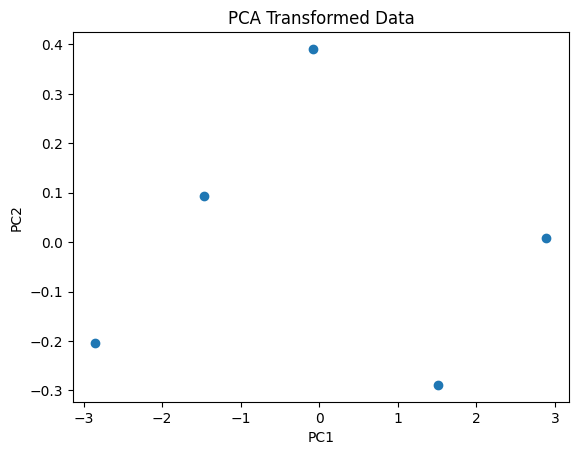

In [415]:
# 주성분 변환
transformed_data = pca.transform(df)

# 주성분으로 변환된 데이터프레임 생성
df_transformed = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

# 주성분 분석 결과 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 설명 분산 비율:", explained_variance_ratio)

# 시각화 (2차원으로 축소한 경우)
plt.scatter(df_transformed['PC1'], df_transformed['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.show()

## 필터링 방법

In [438]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1,5,1
1,2,4,1
2,3,3,1
3,4,2,0
4,5,1,0


In [440]:
# Applying VarianceThreshold to select features
selector = VarianceThreshold(threshold=0.2)  # Set the variance threshold
selected_features = selector.fit_transform(df)

# Get the indices of the selected features
indices = selector.get_support(indices=True)
print("1. Selected feature indices:", indices)

# New dataset with selected features
df_selected = df.iloc[:, indices]
print("2. New dataset with selected features:")
print(df_selected)

1. Selected feature indices: [0 1 2]
2. New dataset with selected features:
   Feature1  Feature2  Feature3
0         1         5         1
1         2         4         1
2         3         3         1
3         4         2         0
4         5         1         0


## 래퍼 방법(Wrapper Methods)

In [441]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 가상 데이터 생성
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# 모델 초기화
model = LogisticRegression()

# RFE 초기화
rfe = RFE(model, n_features_to_select=5)  # 선택할 특성의 개수

In [442]:
# RFE 적합
fit = rfe.fit(X, y)

# 선택된 특성 랭킹
print("특성 랭킹:", fit.ranking_)

# 선택된 특성 마스크
print("선택된 특성 마스크:", fit.support_)

# 선택된 특성으로 데이터 변환
X_selected = rfe.transform(X)
print("선택된 특성만 포함된 새로운 데이터셋:")
print(X_selected)

특성 랭킹: [1 1 1 1 3 4 1 5 2 6]
선택된 특성 마스크: [ True  True  True  True False False  True False False False]
선택된 특성만 포함된 새로운 데이터셋:
[[-1.14052601  1.35970566  0.86199147  0.84609208  1.75479418]
 [-0.07873421 -1.32933233  0.6273745  -1.19300559  0.49799829]
 [ 0.80742726  0.73019848 -1.28568005  0.88948365  0.04808495]
 [ 0.58846525 -0.3751207  -0.57500215 -0.14951801  0.24368721]
 [ 1.63631177 -1.64060704 -1.36045573 -0.94116325  0.13074058]
 [-0.47936995 -1.08324727  1.02255619 -1.09939128  1.36687427]
 [ 2.48904785 -2.52343407 -2.05832072 -1.45612516 -1.02438764]
 [-0.23938468  1.56931739 -0.3313761   1.306542   -1.65485667]
 [ 0.67287309 -0.72427983 -0.53963044 -0.43066755  1.09877685]
 [-1.22823431  2.38869353  0.55942643  1.7240021  -0.57689187]
 [-0.82741596  0.88629356  0.66530077  0.52576893  0.48937456]
 [ 1.6253749   0.06194498 -2.02632079  0.55253544 -0.14436041]
 [ 0.40238353  1.06173727 -0.91916686  1.05688647  1.87679581]
 [ 0.30759353  0.01722979 -0.38566776  0.1094067   0.662

## 임베디드 방법(Embedded Methods)

In [444]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

# 가상 데이터 생성
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Lasso 모델 초기화 (L1 정규화 사용)
lasso = Lasso(alpha=0.1)  # alpha는 정규화 강도를 조절하는 매개변수

# Lasso 모델에 데이터를 적합하여 특성 선택 수행
lasso.fit(X, y)

# 선택된 특성 확인
selected_features = lasso.coef_ != 0
print("선택된 특성 마스크:", selected_features)

# 선택된 특성으로 새로운 데이터셋 생성
X_selected = X[:, selected_features]
print("새로운 데이터셋 크기:", X_selected.shape)

선택된 특성 마스크: [ True  True  True  True  True  True  True  True  True  True]
새로운 데이터셋 크기: (100, 10)


# 데이터 품질 검증과 학습모델

## 교차검증 모델 만들기

In [452]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화 객체를 생성합니다.
standardizer = StandardScaler()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 폴드의 점수 : {}".format(cv_results))

평균 : 0.9693916821849783
10개 폴드의 점수 : [0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


## 사이킷런의 pipeline 패키지

In [449]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 폴드의 점수 : {}".format(cv_results))

평균 : 0.9693916821849783
10개 폴드의 점수 : [0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


## ShuffleSplit

In [450]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 검증 점수 개수 : {}".format(len(cv_results)))

평균 : 0.9630555555555554
10개 검증 점수 개수 : 10


## RepeatedKFold

In [451]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 평균을 계산합니다.
print("평균 : {}".format(cv_results.mean()))

# 10개 폴드의 점수를 모두 확인하기
print("10개 검증 점수 개수 : {}".format(len(cv_results)))

평균 : 0.9695065176908755
10개 검증 점수 개수 : 50


## iris - K-Fold

In [453]:
# iris - train, validation, test dataset으로 분리
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #모델-결정트리
from sklearn.metrics import accuracy_score # 모델 평가함수 -> 정확도
from sklearn.model_selection import train_test_split # 데이터셋을 나누는 함수.

iris_data = load_iris()
iris_data.keys()
X, y = iris_data.data, iris_data.target
X.shape, y.shape

import numpy as np
# train, test로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #기본:0.25
                                                    stratify=y, #target의 class비율에 맞춰서 분리
                                                    random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))

(120, 4) (120,) (30, 4) (30,)
(array([0, 1, 2]), array([40, 40, 40], dtype=int64))


In [454]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, stratify=y_train, 
                                                  random_state=1)
X_train.shape, X_val.shape, X_test.shape

((96, 4), (24, 4), (30, 4))

In [455]:
# 모델 생성
tree = DecisionTreeClassifier()
# 모델 학습 - train set
tree.fit(X_train, y_train)
# 예측 및 평가 - train/validation set
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

train_score = accuracy_score(y_train, pred_train)
val_score = accuracy_score(y_val, pred_val)
print("train set의 예측결과: {}, validation set의 예측결과: {}".format(train_score, val_score))
# ==> train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666

# 최종 평가 - test
pred_test = tree.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print("최종평가(test set): {}".format(test_score))
#==> 최종평가(test set): 0.9666666666666667

train set의 예측결과: 1.0, validation set의 예측결과: 0.9166666666666666
최종평가(test set): 0.9666666666666667


In [456]:
#KFold
#•지정한 개수(K)만큼 분할한다.
from sklearn.model_selection import KFold

# K-Fold K-개수, fold 나눠진 데이터셋 - 5개
kfold = KFold(n_splits=5)
acc_train_list = [] # 평가지표들을 저장할 리스트
acc_test_list = []

ex = kfold.split(X)
print(type(ex))
next(ex) # 반복자의 다음 요소 구하기

<class 'generator'>


(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [457]:
for train_index, test_index in kfold.split(X):
    # index를 이용해 훈련/검증 데이터셋 추출
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_test_list, np.mean(acc_test_list)
# ==> ([1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8], 0.9199999999999999)

([1.0,
  0.9666666666666667,
  0.8666666666666667,
  0.9333333333333333,
  0.7333333333333333],
 0.9)

## iris - Stratified K 폴드

In [458]:
from sklearn.model_selection import StratifiedKFold

s_fold = StratifiedKFold(n_splits=3)
acc_train_list = []
acc_test_list = []

ex = s_fold.split(X, y) #label의 class 별 동일한 분포로 나눈다.
type(ex)

generator

In [459]:
for train_index, test_index in s_fold.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # 모델생성
    tree = DecisionTreeClassifier()
    # 학습
    tree.fit(X_train, y_train)
    # 검증
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)

    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

acc_train_list, np.mean(acc_train_list)
#==> [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

acc_test_list, np.mean(acc_test_list)
#==> ([0.98, 0.92, 0.96, 0.98, 0.92, 0.96], 0.9533333333333333)

([0.98, 0.94, 1.0], 0.9733333333333333)

## iris - cross_val_score( ) 

In [460]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()

score_list = cross_val_score(tree, X, y, scoring='accuracy', cv=3)

score_list
#==> array([0.98, 0.94, 0.98])
np.mean(score_list)
# ==> 0.9666666666666667

0.9533333333333333

## iris - K-Fold 데이터 세트 분할

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X, y = data.data, data.target

# 데이터 분할 (70% 학습용, 30% 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.

In [463]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [465]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [468]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [469]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0
 1 1 1]


In [471]:
print("Confusion Matrix")
print(confusion_matrix(y_test ,y_pred))

Confusion Matrix
[[35  7]
 [ 4 68]]


In [473]:
print("Accuracy")
print(accuracy_score(y_test, y_pred, normalize = True))

Accuracy
0.9035087719298246


In [474]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.91      0.94      0.93        72

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



In [475]:
print("AUC")
print(roc_auc_score(y_test, y_pred))

AUC
0.888888888888889


In [476]:
print("Mean Squared Error")
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.09649122807017543


## K 홀드 아웃 검증을 통한 실습

In [477]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [478]:
for train_index, test_index in skf.split(X, y):
    print("Train set :", train_index)
    print("Test set:", test_index)

Train set : [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 30

In [479]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print("K Fold Cross Validation Score")
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.92982456 0.85964912 0.92982456 0.89473684 0.9122807  0.9122807
 0.9122807  0.94736842 0.92982456 0.94642857]
Average Accuracy
0.9174498746867167


In [480]:
skf_sh = StratifiedKFold(n_splits=10, shuffle=True)
skf_sh.get_n_splits(X, y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [481]:
for train_index, test_index in skf_sh.split(X, y):
    print("Train set:", train_index)
    print("Test set:", test_index)

Train set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  79  82  83  84  85  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114 115 116
 117 118 119 121 123 124 125 126 128 129 130 131 132 133 134 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 156 159
 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 194 196 198 199
 200 202 203 204 205 206 207 208 210 211 212 213 214 215 216 217 218 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 267 268

In [482]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf_sh)
print("K Fold Cross Validation Score")
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.87719298 0.98245614 0.9122807  0.85964912 0.96491228 0.9122807
 0.92982456 0.87719298 0.98245614 0.91071429]
Average Accuracy
0.9208959899749374


### Question 1

In [490]:
import pandas as pd

df = pd.read_csv("datasets/diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [491]:
df_X = df.copy()
ser_y = df_X.pop("price")
df_X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31


### Question 2

In [492]:
df_tr_X, df_te_X, ser_tr_y, ser_te_y = train_test_split(df_X, 
                                                        ser_y,
                                                        train_size = 0.8,
                                                        random_state = 123)
len(df_tr_X), len(df_te_X), len(ser_tr_y), len(ser_te_y)

(43152, 10788, 43152, 10788)

### Question 3

In [493]:
import pandas as pd

df1 = pd.DataFrame(dict(col1 = range(5),
                        col2 = range(100, 105),
                        Xgrp = ["train"] * 3 + ["test"] * 2))
df1

,col1,col2,Xgrp
0,0,100,train
1,1,101,train
2,2,102,train
3,3,103,test
4,4,104,test


In [494]:
df1_train = df1.loc[df1["Xgrp"] == "train", ]
df1_test  = df1.loc[df1["Xgrp"] == "test", ]
len(df1_train), len(df1_test)

(3, 2)

### Question 4

In [495]:
import pandas as pd

df2 = pd.DataFrame(dict(ID = range(1, 6),
                        value = range(100, 105)))
df2

,ID,value
0,1,100
1,2,101
2,3,102
3,4,103
4,5,104


In [496]:
df2_train = df2.loc[df2["ID"] % 5 != 0, ]
df2_test  = df2.loc[df2["ID"] % 5 == 0, ]
len(df2_train), len(df2_test)

(4, 1)

### Question 5

In [497]:
import pandas as pd

df3 = pd.DataFrame(dict(ID = range(1, 12),
                        value = range(100, 111)))
df3["ID"] = "lot_" + df3["ID"].astype("str").str.zfill(3)
df3

,ID,value
0,lot_001,100
1,lot_002,101
2,lot_003,102
3,lot_004,103
4,lot_005,104
5,lot_006,105
6,lot_007,106
7,lot_008,107
8,lot_009,108
9,lot_010,109


In [498]:
df3["ID_1"] = df3["ID"].str.replace("lot_", "")
df3["ID_2"] = df3["ID"].str.replace("[^0-9]", "", regex = True)
df3["ID_3"] = df3["ID"].str.split("_", expand = True)[1]
df3["ID_num"] = df3["ID_1"].astype("int")
df3

,ID,value,ID_1,ID_2,ID_3,ID_num
0,lot_001,100,001,001,001,1
1,lot_002,101,002,002,002,2
2,lot_003,102,003,003,003,3
3,lot_004,103,004,004,004,4
4,lot_005,104,005,005,005,5
5,lot_006,105,006,006,006,6
6,lot_007,106,007,007,007,7
7,lot_008,107,008,008,008,8
8,lot_009,108,009,009,009,9
9,lot_010,109,010,010,010,10


In [499]:
df3_train = df3.loc[df3["ID_num"] % 3 != 0, ]
df3_test  = df3.loc[df3["ID_num"] % 3 == 0, ]
len(df3_train), len(df3_test)

(8, 3)

### Question 6

In [500]:
import pandas as pd

df4 = pd.DataFrame(dict(ID = ["lotA81023", "lotB0021", "order_329145", "order_12932_Z3", "re-498"],
                        value = range(100, 105)))
df4

,ID,value
0,lotA81023,100
1,lotB0021,101
2,order_329145,102
3,order_12932_Z3,103
4,re-498,104


In [501]:
df4["ID_1"] = df4["ID"].str.extract("([0-9]{3,})")
df4["ID_num"] = df4["ID_1"].astype("int")
df4

,ID,value,ID_1,ID_num
0,lotA81023,100,81023,81023
1,lotB0021,101,0021,21
2,order_329145,102,329145,329145
3,order_12932_Z3,103,12932,12932
4,re-498,104,498,498


In [502]:
df4_train = df4.loc[df4["ID_num"] % 5 != 0, ]
df4_test  = df4.loc[df4["ID_num"] % 5 == 0, ]
(len(df4_train), len(df4_test))

(4, 1)